#### Mobile price depends on various factors such as resolution, brand, size, weight, imaging quality, RAM, battery and cpu power. In this dataset, we want to estimate the price of mobile phones using the above features

#### i.	Download the dataset from above link and load it into your Python environment.
#### ii.	Perform the EDA and do the visualizations.
#### iii.	Check the distributions/skewness in the variables and do the transformations if required.
#### iv.	Check/Treat the outliers and do the feature scaling if required.
#### v.	Create a ML model to predict the price of the phone based on the specifications given.
#### vi.	Check for overfitting and use the Regularization techniques if required
#### vii.	Compare the performance metrics of training dataset and testing dataset for all the different algorithms used (Linear/Ridge/Lasso/ElasticNet)


<div style="background-color: #322f3d; color: white; padding: 15px; border-radius: 8px; font-size: 20px; font-weight: bold;">
  <span style="color: orange;">1</span> | Importing Libraries
</div>

In [476]:
import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import xgboost as xgb

from pandas.plotting import scatter_matrix
from scipy.stats import skew ,boxcox
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge , LassoCV , RidgeCV , ElasticNetCV
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score , train_test_split , KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

sns.set()
%matplotlib inline

In [478]:
mobile = pd.read_csv("Cellphone.csv")

In [480]:
mobile.shape

(161, 14)

In [482]:
mobile

Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0           203   2357    10   135.0         5.20  424         8     1.350   
1           880   1749    10   125.0         4.00  233         2     1.300   
2            40   1916    10   110.0         4.70  312         4     1.200   
3            99   1315    11   118.5         4.00  233         2     1.300   
4           880   1749    11   125.0         4.00  233         2     1.300   
..          ...    ...   ...     ...          ...  ...       ...       ...   
156        1206   3551  4638   178.0         5.46  538         4     1.875   
157        1296   3211  8016   170.0         5.50  534         4     1.975   
158         856   3260  8809   150.0         5.50  401         8     2.200   
159        1296   3211  8946   170.0         5.50  534         4     1.975   
160        1131   2536  9807   202.0         6.00  367         8     1.500   

     internal mem    ram  RearCam  Front_Cam  battery  thickness  
0            16.0  3.000    13.00        8.0     2610        7.4  
1             4.0  1.000     3.15        0.0     1700        9.9  
2             8.0  1.500    13.00        5.0     2000        7.6  
3             4.0  0.512     3.15        0.0     1400       11.0  
4             4.0  1.000     3.15        0.0     1700        9.9  
..            ...    ...      ...        ...      ...        ...  
156         128.0  6.000    12.00       16.0     4080        8.4  
157         128.0  6.000    20.00        8.0     3400        7.9  
158          64.0  4.000    20.00       20.0     3000        6.8  
159         128.0  6.000    20.00        8.0     3400        7.9  
160          16.0  3.000    21.50       16.0     2700        8.4  

[161 rows x 14 columns]

In [484]:
mobile.info

<bound method DataFrame.info of      Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0           203   2357    10   135.0         5.20  424         8     1.350   
1           880   1749    10   125.0         4.00  233         2     1.300   
2            40   1916    10   110.0         4.70  312         4     1.200   
3            99   1315    11   118.5         4.00  233         2     1.300   
4           880   1749    11   125.0         4.00  233         2     1.300   
..          ...    ...   ...     ...          ...  ...       ...       ...   
156        1206   3551  4638   178.0         5.46  538         4     1.875   
157        1296   3211  8016   170.0         5.50  534         4     1.975   
158         856   3260  8809   150.0         5.50  401         8     2.200   
159        1296   3211  8946   170.0         5.50  534         4     1.975   
160        1131   2536  9807   202.0         6.00  367         8     1.500   

     internal mem    ram  RearC

In [486]:
mobile.columns = mobile.columns.str.strip().str.lower().str.replace(' ', '_')

In [488]:
mobile.columns

Index(['product_id', 'price', 'sale', 'weight', 'resoloution', 'ppi',
       'cpu_core', 'cpu_freq', 'internal_mem', 'ram', 'rearcam', 'front_cam',
       'battery', 'thickness'],
      dtype='object')

In [490]:
mobile.duplicated().sum()

0

In [492]:
mobile.isna().sum()

product_id      0
price           0
sale            0
weight          0
resoloution     0
ppi             0
cpu_core        0
cpu_freq        0
internal_mem    0
ram             0
rearcam         0
front_cam       0
battery         0
thickness       0
dtype: int64

In [494]:
mobile.isnull().sum()

product_id      0
price           0
sale            0
weight          0
resoloution     0
ppi             0
cpu_core        0
cpu_freq        0
internal_mem    0
ram             0
rearcam         0
front_cam       0
battery         0
thickness       0
dtype: int64

In [496]:
mobile.describe()

product_id        price         sale      weight  resoloution  \
count   161.000000   161.000000   161.000000  161.000000   161.000000   
mean    675.559006  2215.596273   621.465839  170.426087     5.209938   
std     410.851583   768.187171  1546.618517   92.888612     1.509953   
min      10.000000   614.000000    10.000000   66.000000     1.400000   
25%     237.000000  1734.000000    37.000000  134.100000     4.800000   
50%     774.000000  2258.000000   106.000000  153.000000     5.150000   
75%    1026.000000  2744.000000   382.000000  170.000000     5.500000   
max    1339.000000  4361.000000  9807.000000  753.000000    12.200000   

              ppi    cpu_core    cpu_freq  internal_mem         ram  \
count  161.000000  161.000000  161.000000    161.000000  161.000000   
mean   335.055901    4.857143    1.502832     24.501714    2.204994   
std    134.826659    2.444016    0.599783     28.804773    1.609831   
min    121.000000    0.000000    0.000000      0.000000    0.000000   
25%    233.000000    4.000000    1.200000      8.000000    1.000000   
50%    294.000000    4.000000    1.400000     16.000000    2.000000   
75%    428.000000    8.000000    1.875000     32.000000    3.000000   
max    806.000000    8.000000    2.700000    128.000000    6.000000   

          rearcam   front_cam      battery   thickness  
count  161.000000  161.000000   161.000000  161.000000  
mean    10.378261    4.503106  2842.111801    8.921739  
std      6.181585    4.342053  1366.990838    2.192564  
min      0.000000    0.000000   800.000000    5.100000  
25%      5.000000    0.000000  2040.000000    7.600000  
50%     12.000000    5.000000  2800.000000    8.400000  
75%     16.000000    8.000000  3240.000000    9.800000  
max     23.000000   20.000000  9500.000000   18.500000

## 3D Plots / Multiple Axes (Visual Insight)

In [499]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mobile['ram'], mobile['battery'], mobile['price'], c='r', marker='o')
ax.set_xlabel('RAM')
ax.set_ylabel('Battery')
ax.set_zlabel('Price')
plt.title("3D Scatter Plot: RAM vs Battery vs Price")
#plt.show()

Text(0.5, 0.92, '3D Scatter Plot: RAM vs Battery vs Price')

## Pairplot (Correlation Visualization)

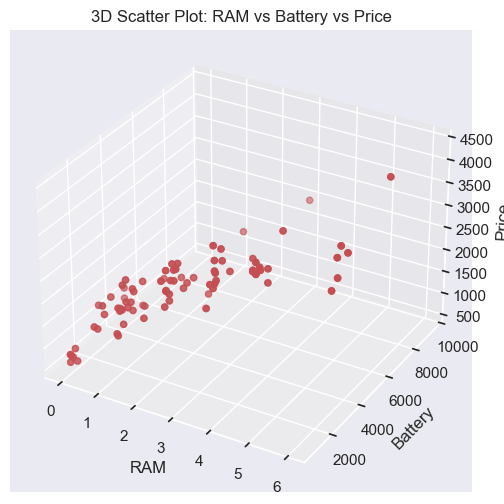

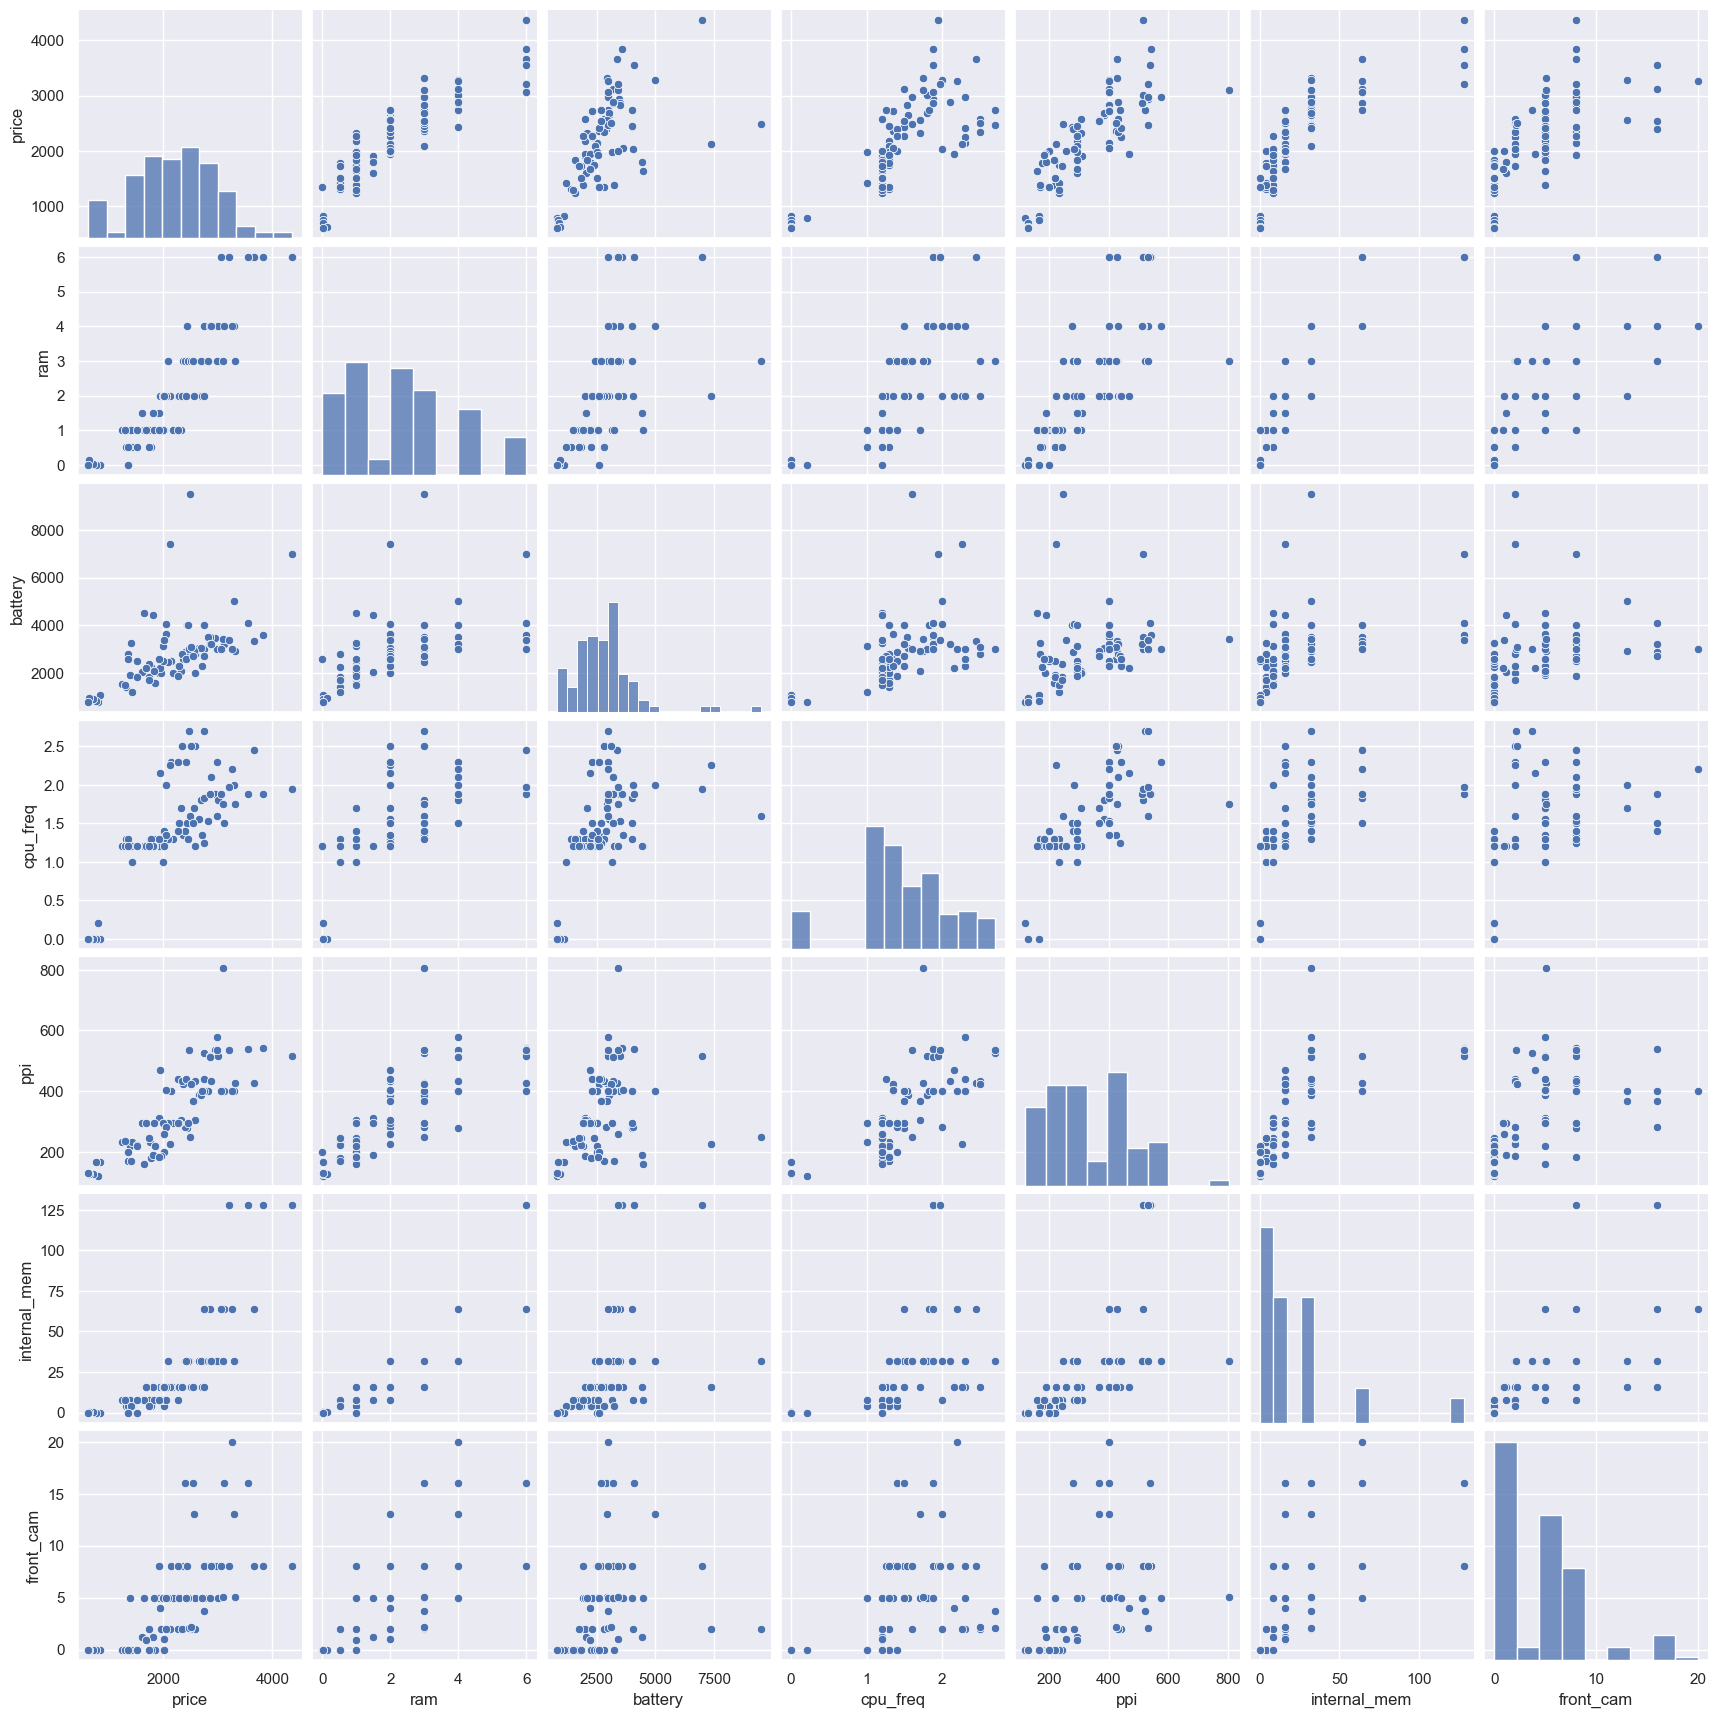

In [502]:
selected_cols = ['price', 'ram', 'battery', 'cpu_freq', 'ppi',"internal_mem","front_cam"]  # choose relevant features
sns.pairplot(mobile[selected_cols])
plt.show()

## MultiCollinearity Detection

In [504]:
def multicolinearity(mobile):
    X = add_constant(mobile)    #This is done because many statistical models require an intercept term.
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Drop  column it’s not an actual feature — it's just there for model fitting.
    vif_data = vif_data[vif_data["Feature"] != "const"]
    
    # Add interpretation column
    def interpret_vif(vif):
        if vif < 1.5:
            return "Low"
        elif vif < 5:
            return "Moderate"
        else:
            return "High"
    
    vif_data["Multicollinearity Level"] = vif_data["VIF"].apply(interpret_vif)
    return vif_data

print("Data:",multicolinearity(mobile))

Data:          Feature        VIF Multicollinearity Level
1     product_id   1.302772                     Low
2          price  21.877376                    High
3           sale   1.807940                Moderate
4         weight  25.142256                    High
5    resoloution  23.510660                    High
6            ppi   5.357061                    High
7       cpu_core   3.750610                Moderate
8       cpu_freq   4.135018                Moderate
9   internal_mem   8.088167                    High
10           ram  10.151966                    High
11       rearcam   4.050025                Moderate
12     front_cam   2.857181                Moderate
13       battery  11.541270                    High
14     thickness   5.052120                    High


## Outlier Detection

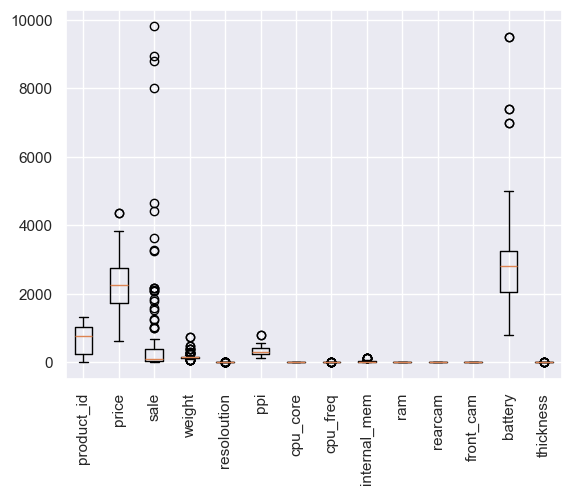

In [506]:
plt.boxplot(mobile,labels=mobile.columns )
plt.xticks(rotation=90)
plt.show()

## Spread and variance of each variable

In [511]:
mobile.skew()

product_id     -0.216869
price           0.052347
sale            4.269384
weight          3.981756
resoloution     1.176110
ppi             0.602503
cpu_core       -0.009077
cpu_freq       -0.512663
internal_mem    2.389683
ram             0.792698
rearcam         0.106929
front_cam       1.169750
battery         2.092660
thickness       1.587680
dtype: float64

In [513]:
def price_vs_var(col):
    #plt.figure(figsize=(10,6))
    sns.histplot(mobile[col],kde=True,color='blue')
    #plt.show() 

cols_to_use = [col for col in mobile.columns if (col !="product_id") ]
for col in cols_to_use:
    price_vs_var(col)

## Outlier Treatment for each variable bu IQR method

In [516]:
mobile.shape

(161, 14)

In [518]:
def iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_value = q3 - q1
    lower_bound = q1 - (1.5 * iqr_value)
    upper_bound = q3 + (1.5 * iqr_value)
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)    

    #Code to replace Outlier with mean
    mean_val = df.loc[~outliers, col].mean()    
    # Replace outliers with mean
    df.loc[outliers, col] = mean_val
    print(col, "Outlier Details:--", df[outliers].shape)
    #Code to replace Outlier with mean

    #return df[~outliers]      #Code to use in case outlier removal
    return df

# Use it properly in a loop
mobile_iqr = mobile.copy()
cols_to_use = [col for col in mobile.columns]

for col in cols_to_use:
    mobile_iqr = iqr(mobile_iqr, col)

product_id Outlier Details:-- (0, 14)
price Outlier Details:-- (2, 14)
sale Outlier Details:-- (24, 14)
weight Outlier Details:-- (24, 14)
resoloution Outlier Details:-- (26, 14)
ppi Outlier Details:-- (2, 14)
cpu_core Outlier Details:-- (0, 14)
cpu_freq Outlier Details:-- (10, 14)
internal_mem Outlier Details:-- (8, 14)
ram Outlier Details:-- (0, 14)
rearcam Outlier Details:-- (0, 14)
front_cam Outlier Details:-- (0, 14)
battery Outlier Details:-- (6, 14)
thickness Outlier Details:-- (8, 14)


In [520]:
mobile.shape

(161, 14)

In [522]:
mobile_iqr.shape

(161, 14)

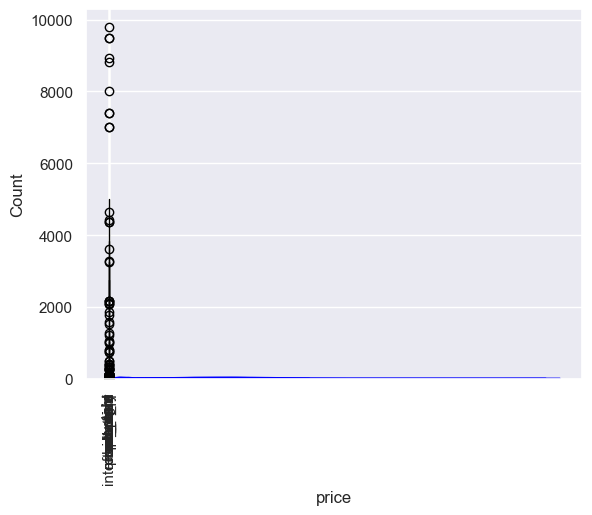

In [524]:
plt.boxplot(mobile,labels=mobile.columns )
plt.xticks(rotation=90)
plt.show()

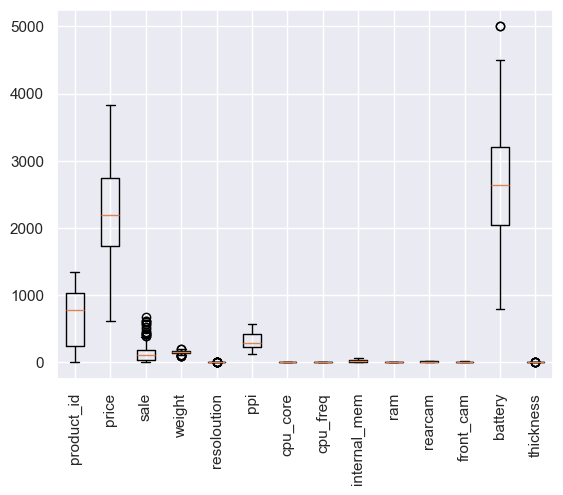

In [526]:
plt.boxplot(mobile_iqr,labels=mobile_iqr.columns )
plt.xticks(rotation=90)
plt.show()

## Skewness Detection and Transformation

In [529]:
mobile.skew()

product_id     -0.216869
price           0.052347
sale            4.269384
weight          3.981756
resoloution     1.176110
ppi             0.602503
cpu_core       -0.009077
cpu_freq       -0.512663
internal_mem    2.389683
ram             0.792698
rearcam         0.106929
front_cam       1.169750
battery         2.092660
thickness       1.587680
dtype: float64

# Quick Decision Table
## Skewness	Suggested Transformation
## ** Skew **	
### 0.5 to 1	Square Root or Log (for positive skew)
### > 1	Log, Cube Root, or Box-Cox (for positive skew)
### 0.5 to -1	Square, Exponential, or Cube Root (for negative skew)
### -1	Exponential or Yeo-Johnson

In [532]:
def reflection_log(data):
    c = np.max(data) + 1
    x_reflected = c - data
    return np.log(x_reflected)

def auto_transform_skewed_df(df):

    transformed_df = df.copy()
    numeric_cols = transformed_df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        print("\nprocesssing for::",col)
        #print("Skew is:",df[col].skew())
        data = transformed_df[col].dropna().values
        if len(data) < 2:
            continue  # Skip if not enough data to calculate skew

        original_skew = skew(data)
        transformed_data = data.copy()
        try:
            if -0.5 <= original_skew <= 0.5:
                print("No Transformation needed for::",col,"Since skewness:",round(df[col].skew(),3),"falls under range of -0.5 <-> +0.5","\n")
                continue  # Low/mid skew, no transformation
            elif 0.5 < original_skew <= 1:
                if np.all(data >= 0):
                    print("Log Transformation needed for::",col,":",df[col].skew())
                    transformed_data = np.sqrt(data)
                    #transformed_data = np.log1p(data)
                    #transformed_data, _ = boxcox(data)
                    #transformed_data = PowerTransformer(method='yeo-johnson').fit_transform(data.reshape(-1, 1)).flatten()
                    #print("New Skew is:",transformed_data[col].skew())
                    print("After Transformation ::",skew(transformed_data),"\n")
    
                else:
                    print("yeo-johnson Transformation needed for::",col,":",df[col].skew())
                    transformed_data = PowerTransformer(method='yeo-johnson').fit_transform(data.reshape(-1, 1)).flatten()
                    print("After Transformation ::",skew(transformed_data),"\n")
            elif original_skew > 1:
                if np.all(data > 0):
                    print("boxcox Transformation needed for::",col,":",df[col].skew())
                    #transformed_data = np.log1p(data)
                    transformed_data, _ = boxcox(data)
                    #print("New Skew is:",transformed_data[col].skew())
                    print("After Transformation ::",skew(transformed_data),"\n")
                else:
                    print("boxcox Transformation needed for::",col,":",df[col].skew())
                    #transformed_data = PowerTransformer(method='yeo-johnson').fit_transform(data.reshape(-1, 1)).flatten()
                    print("After Transformation ::",skew(transformed_data),"\n")
            elif -1 <= original_skew < -0.5:
                print("Before Transformation needed for::",col,":",df[col].skew())
                #transformed_data = np.power(data, 2)
                #transformed_data = np.power(data, 3)
                #reflection_log(data)                          #reflection+Log tranaformation metho
                transformed_data = PowerTransformer(method='yeo-johnson').fit_transform(data.reshape(-1, 1)).flatten() 
                print("After Transformation ::",skew(transformed_data),"\n")
            elif original_skew < -1:
                #print("yeo-johnson Transformation needed for::",col,":",df[col].skew(),"\n")
                #transformed_data = np.exp(data)
                transformed_data = PowerTransformer(method='yeo-johnson').fit_transform(data.reshape(-1, 1)).flatten()        
                print("After Transformation ::",skew(transformed_data),"\n")
        
        except Exception as e:
            print(f"Transformation skipped for {col} due to error: {e}")
        
        # Update only non-null values in the original column
        transformed_df.loc[transformed_df[col].notnull(), col] = transformed_data
    return transformed_df

transformed_mobile = auto_transform_skewed_df(mobile)
combined = pd.concat([mobile.skew(), transformed_mobile.skew()], axis=1)
combined.columns = ['Mobile', 'Trans_Mobile']
combined


processsing for:: product_id
No Transformation needed for:: product_id Since skewness: -0.217 falls under range of -0.5 <-> +0.5 


processsing for:: price
No Transformation needed for:: price Since skewness: 0.052 falls under range of -0.5 <-> +0.5 


processsing for:: sale
boxcox Transformation needed for:: sale : 4.2693840983179445
After Transformation :: 0.07933051399589848 


processsing for:: weight
boxcox Transformation needed for:: weight : 3.981756060198998
After Transformation :: -0.16249569142757758 


processsing for:: resoloution
boxcox Transformation needed for:: resoloution : 1.1761101196508716
After Transformation :: 0.27460504479028547 


processsing for:: ppi
Log Transformation needed for:: ppi : 0.6025028092508479
After Transformation :: 0.15123549034165631 


processsing for:: cpu_core
No Transformation needed for:: cpu_core Since skewness: -0.009 falls under range of -0.5 <-> +0.5 


processsing for:: cpu_freq
Before Transformation needed for:: cpu_freq : -0.51266

Mobile  Trans_Mobile
product_id   -0.216869     -0.216869
price         0.052347      0.052347
sale          4.269384      0.080079
weight        3.981756     -0.164028
resoloution   1.176110      0.277194
ppi           0.602503      0.152661
cpu_core     -0.009077     -0.009077
cpu_freq     -0.512663      0.014312
internal_mem  2.389683      2.389683
ram           0.792698     -0.276718
rearcam       0.106929      0.106929
front_cam     1.169750      1.169750
battery       2.092660      0.034106
thickness     1.587680     -0.042154

## Comparison b/w Transformed and Original Data

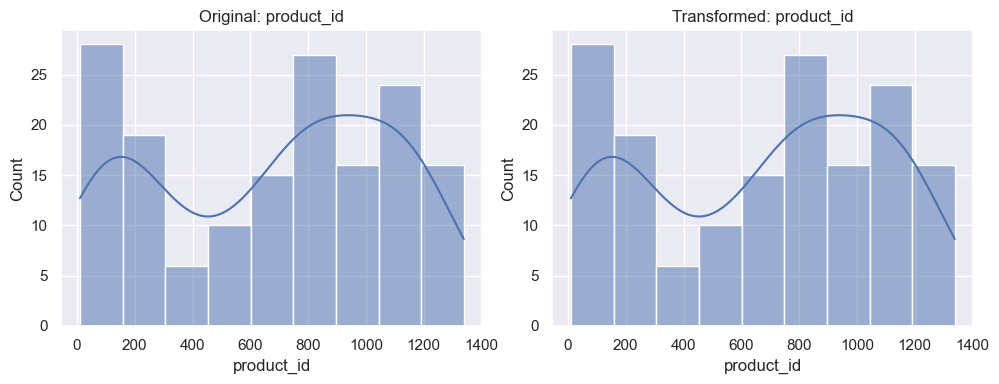

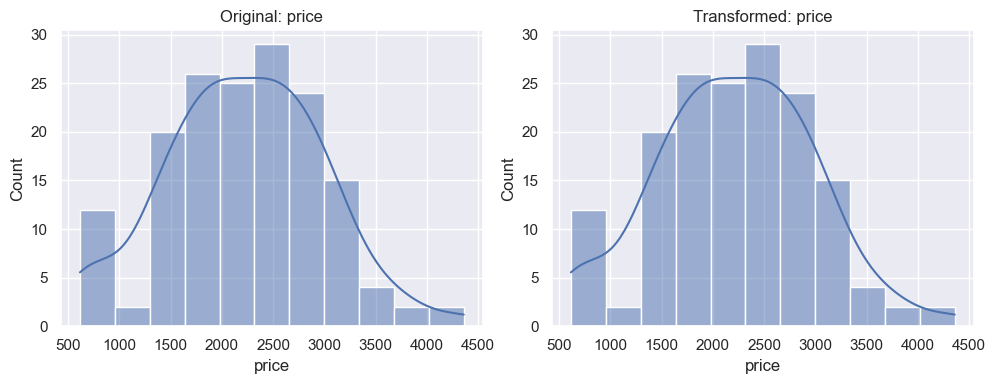

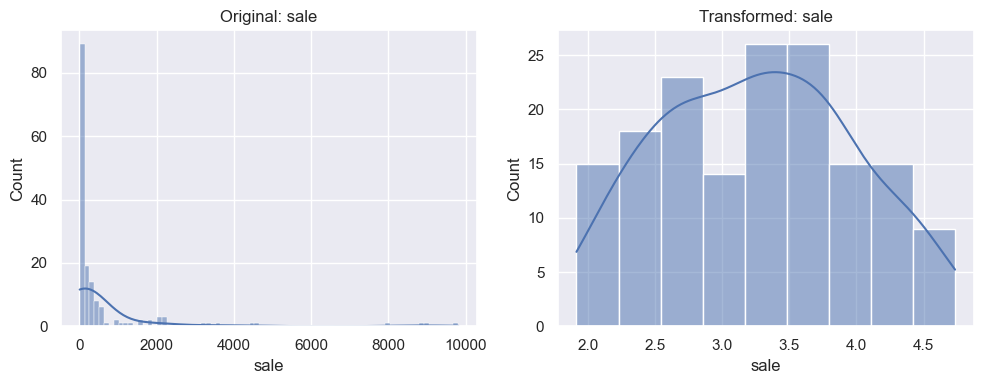

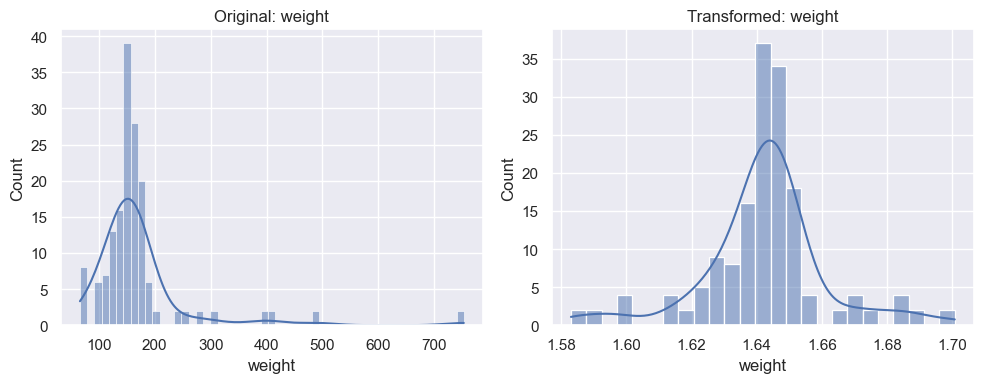

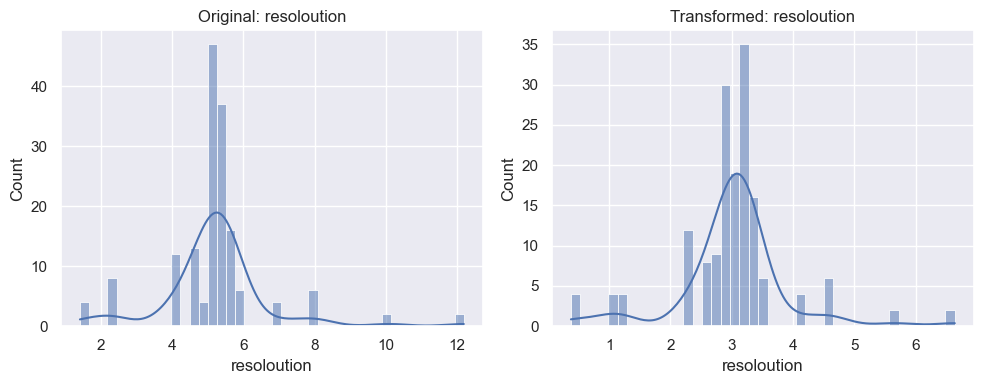

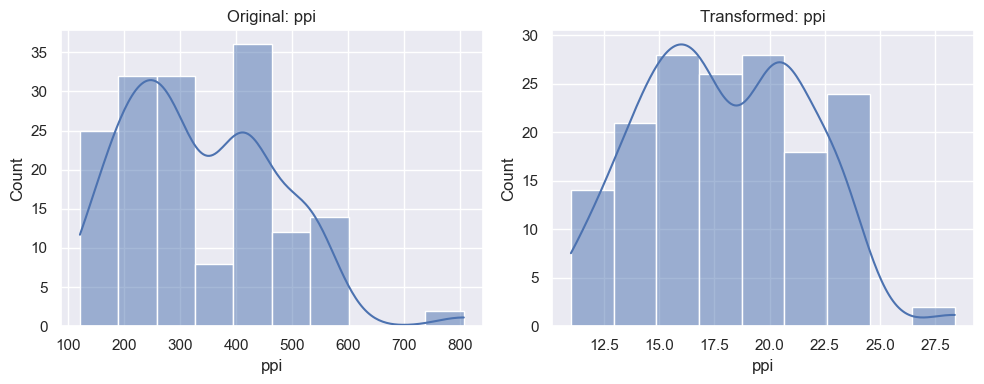

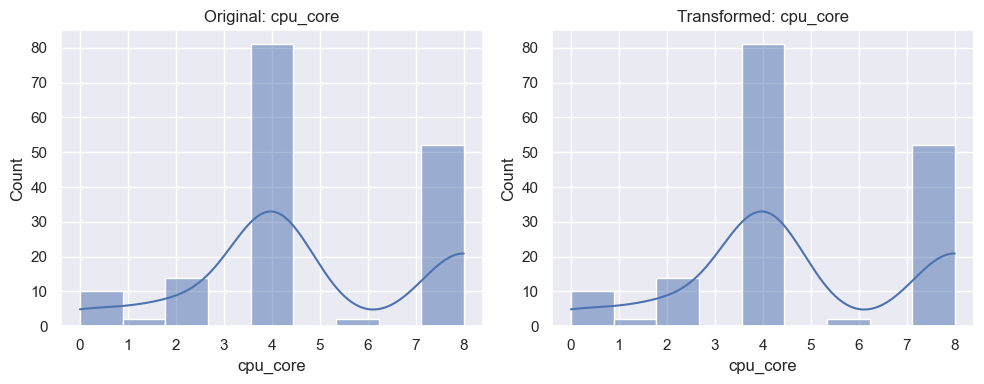

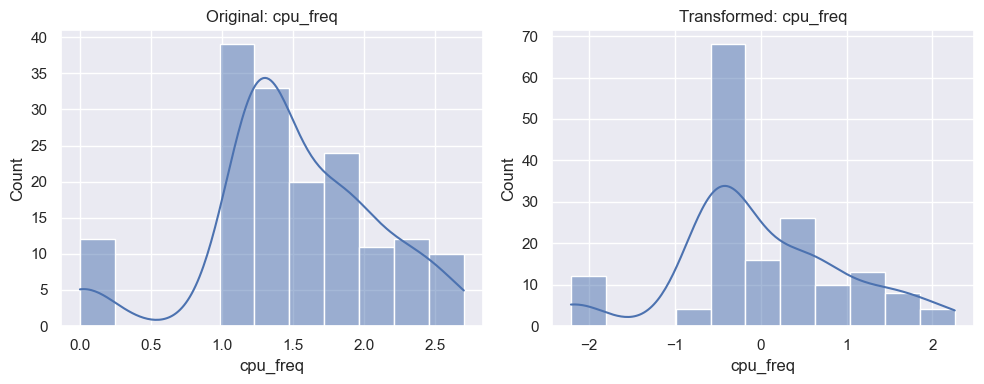

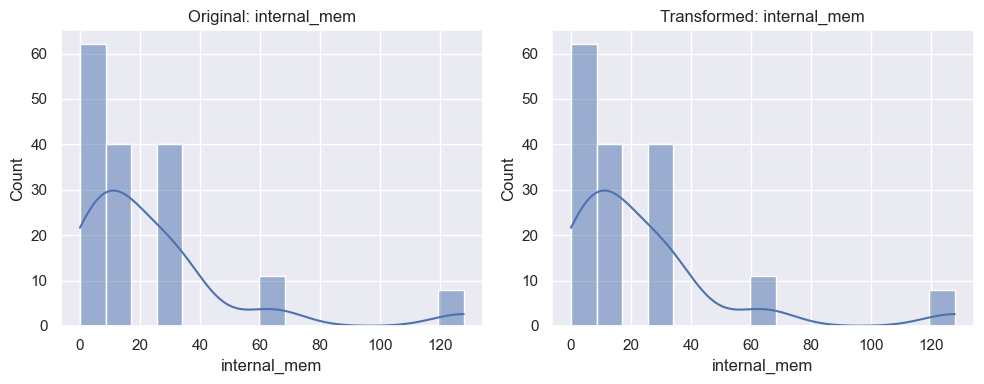

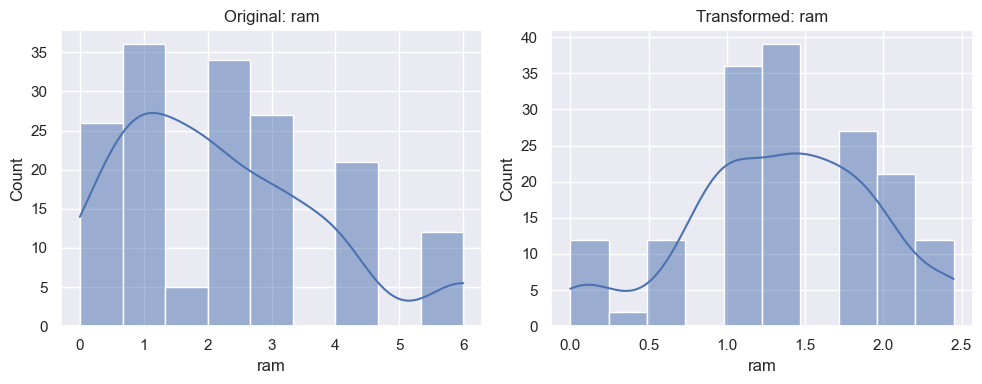

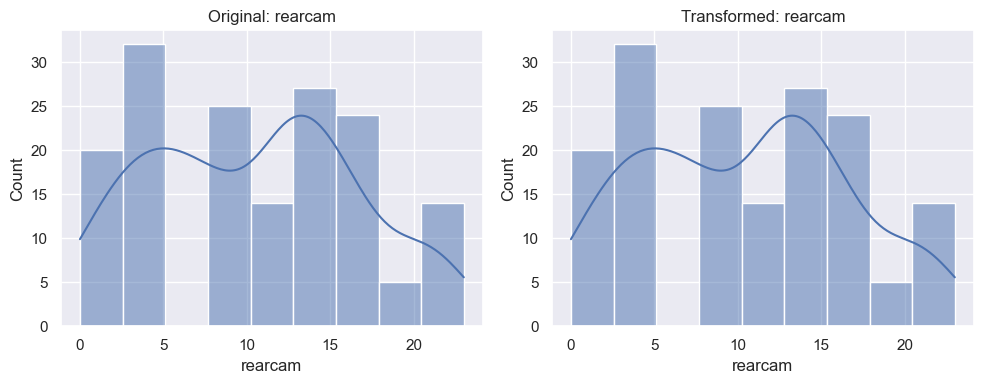

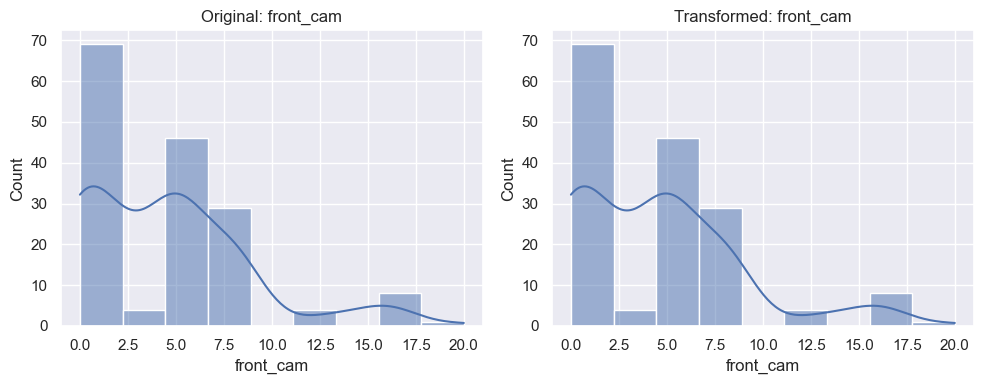

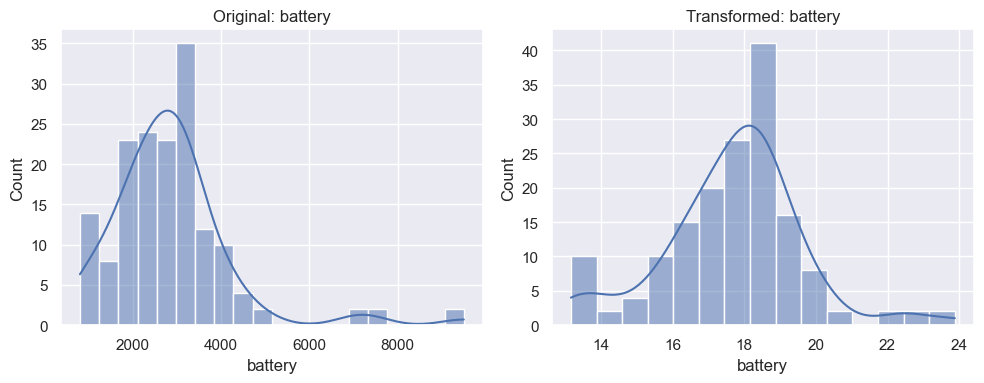

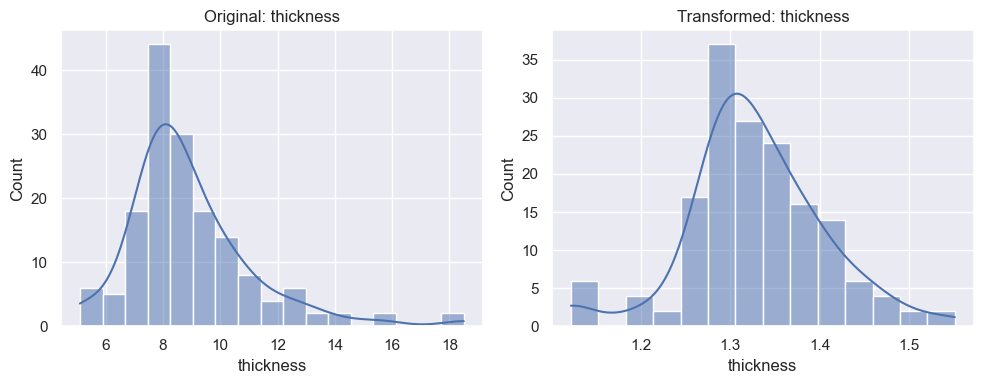

In [536]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_distributions(df_original, df_transformed, columns):
    for col in columns:
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        sns.histplot(df_original[col], kde=True)
        plt.title(f"Original: {col}")

        plt.subplot(1,2,2)
        sns.histplot(df_transformed[col], kde=True)
        plt.title(f"Transformed: {col}")
        plt.tight_layout()
        plt.show()

compare_distributions(mobile, transformed_mobile, mobile.columns)


## Analysis and Visualization of Linear Relation between X and Y

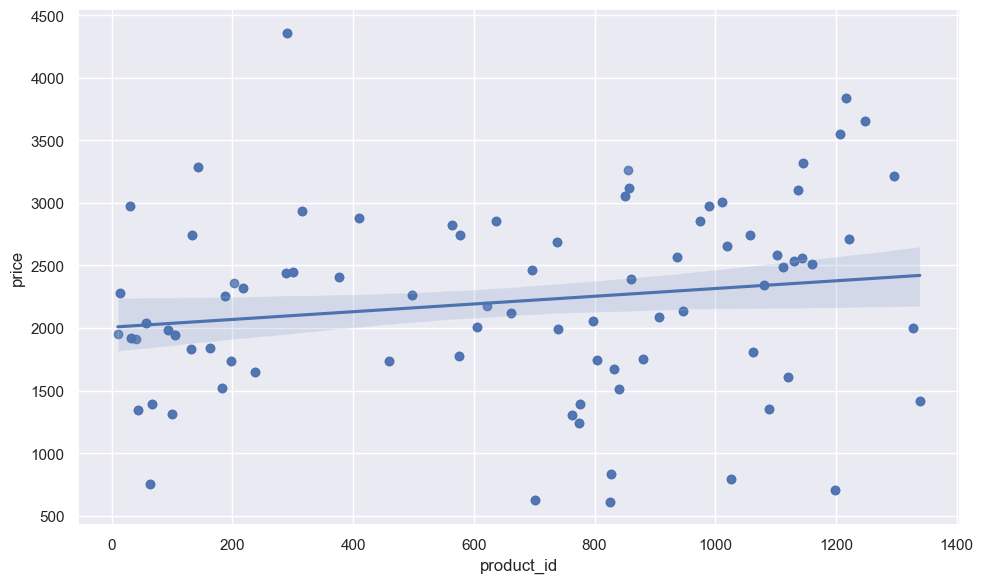

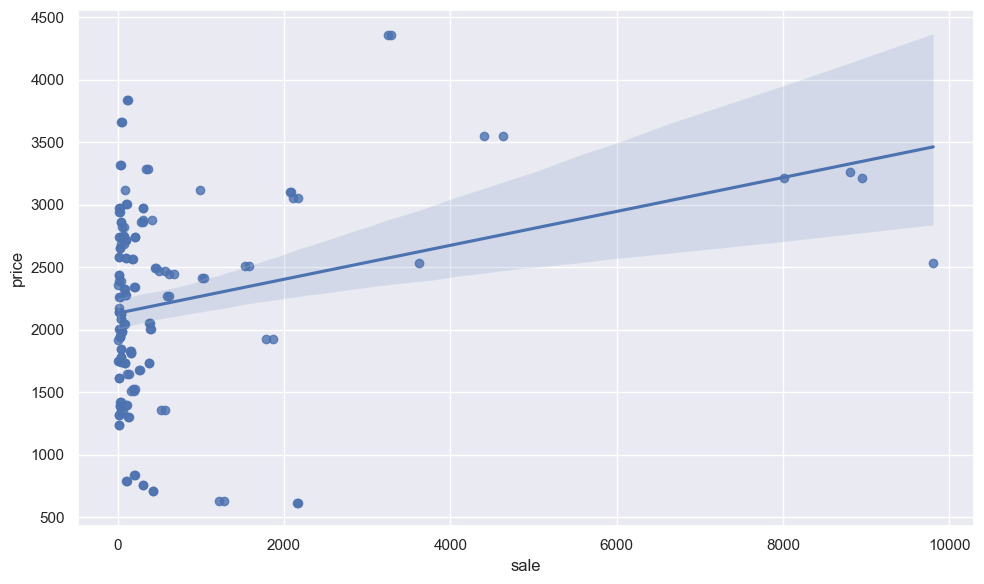

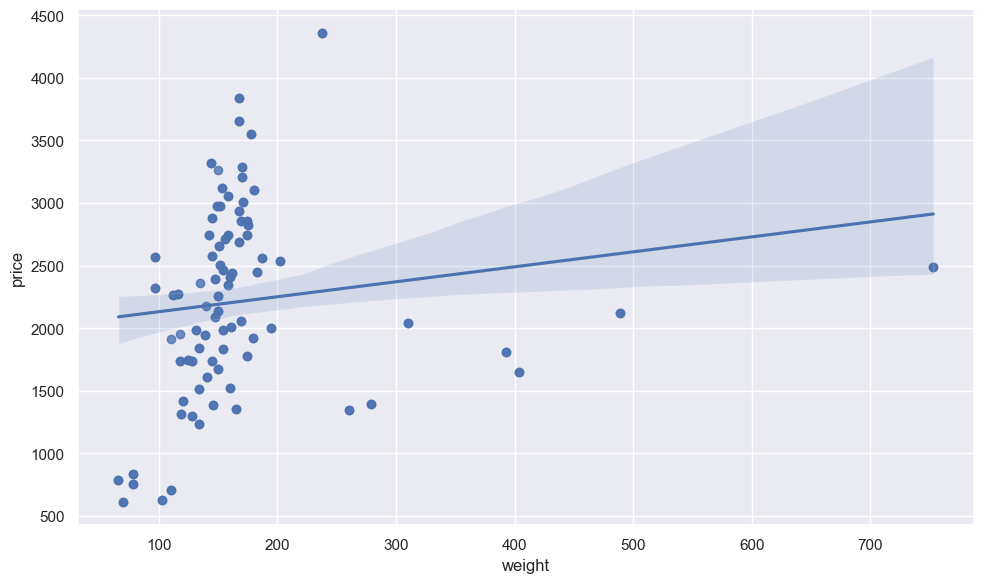

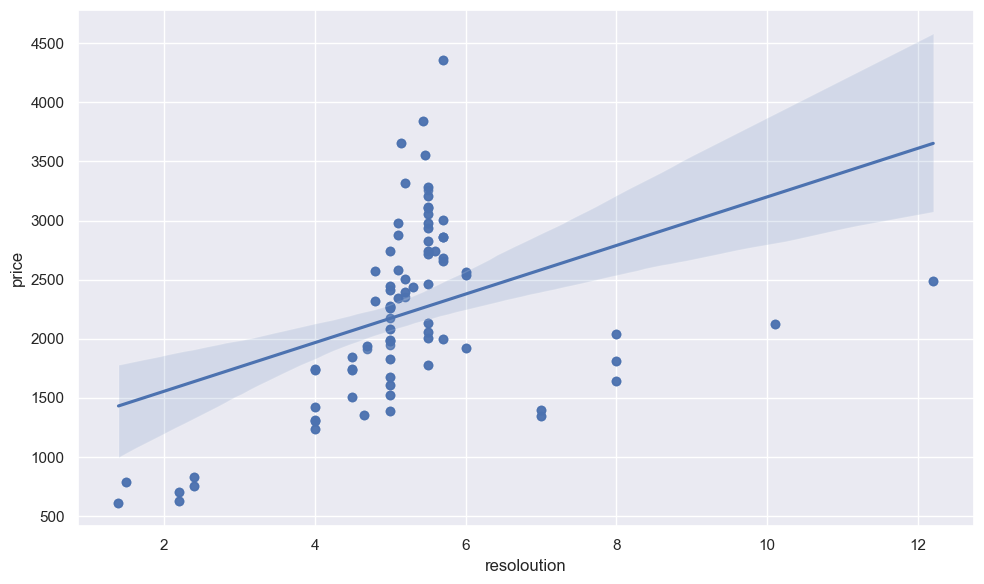

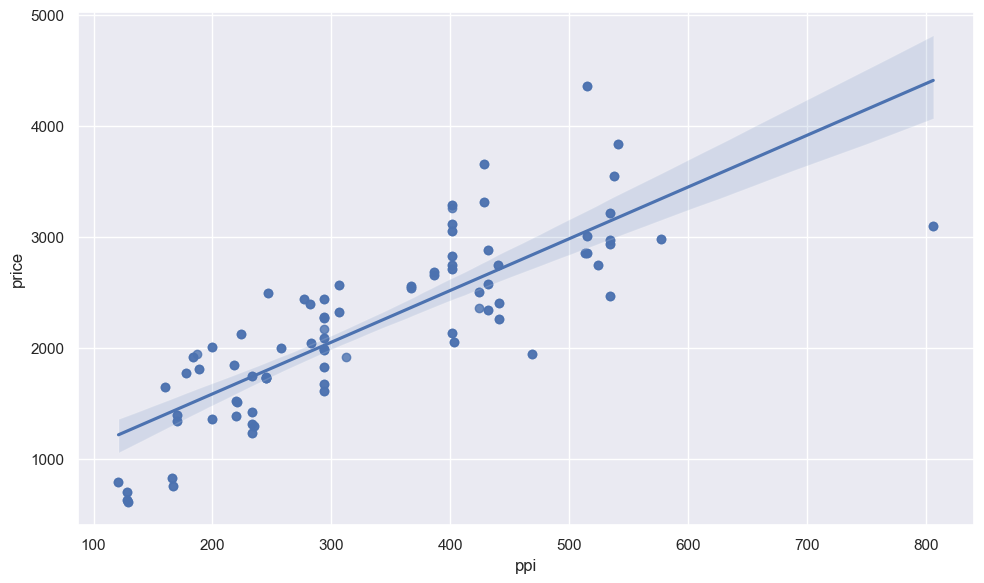

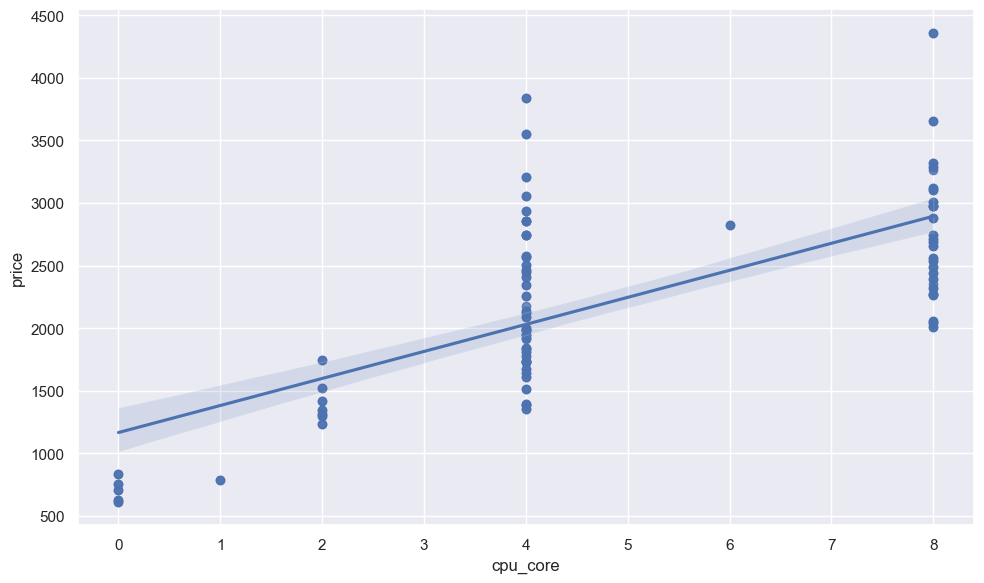

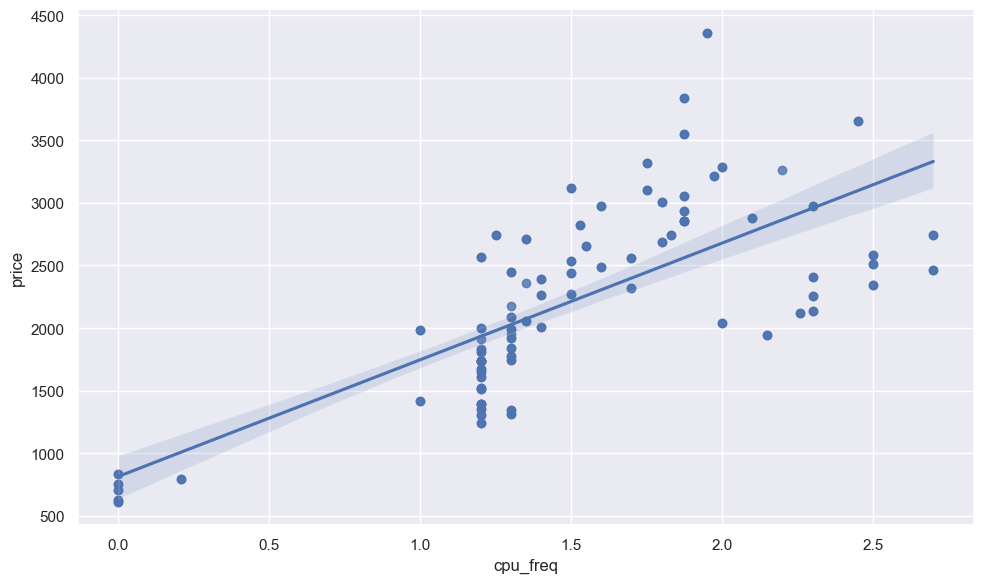

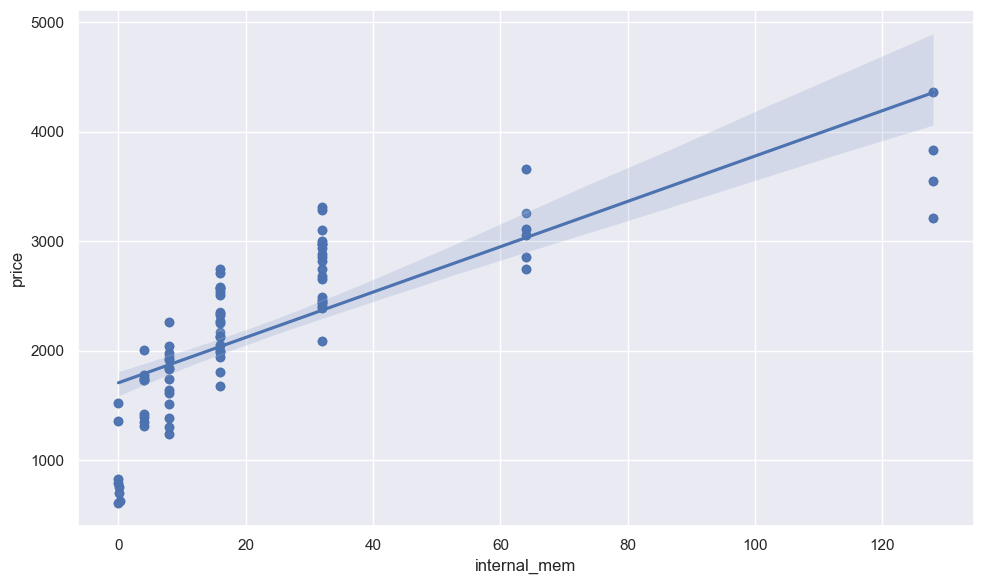

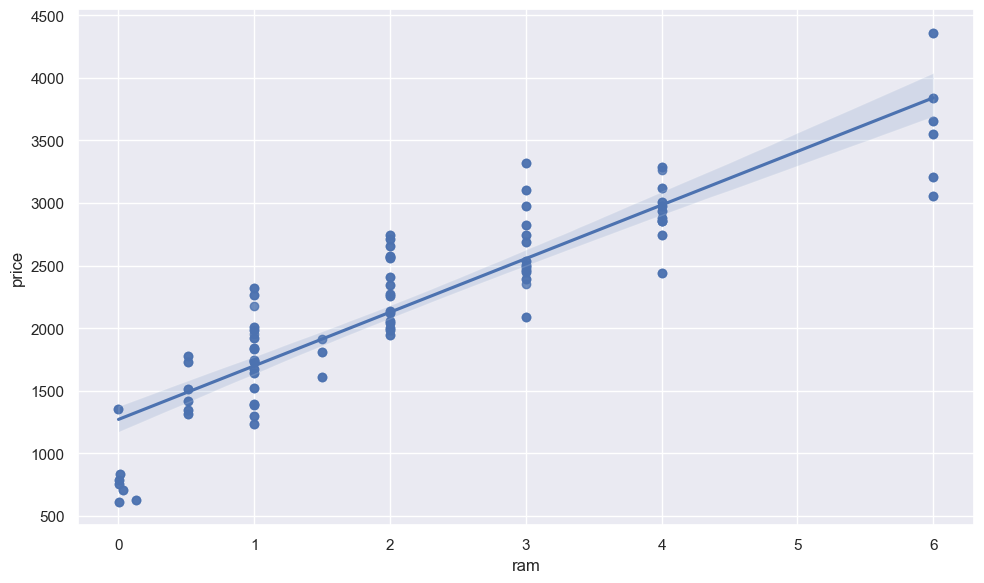

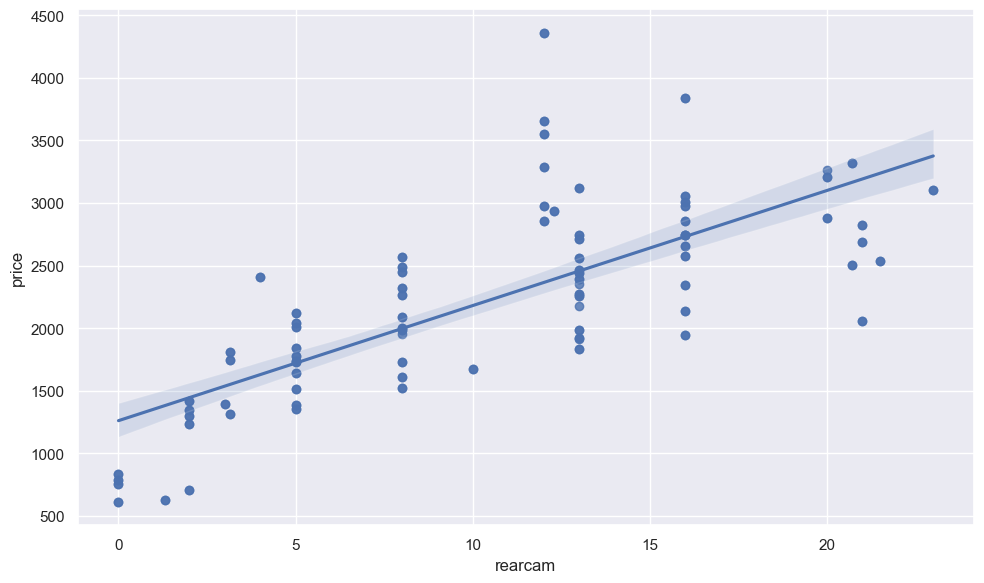

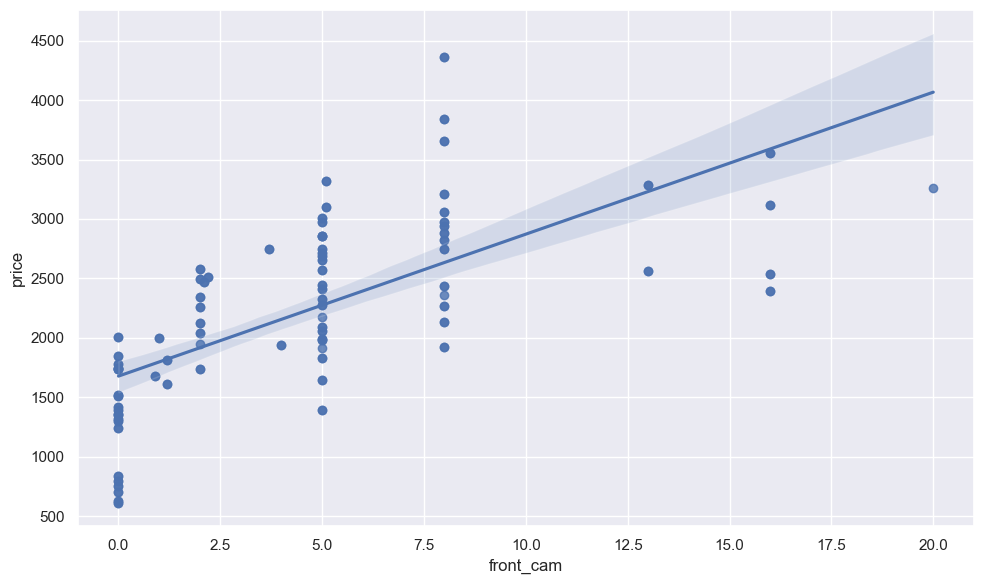

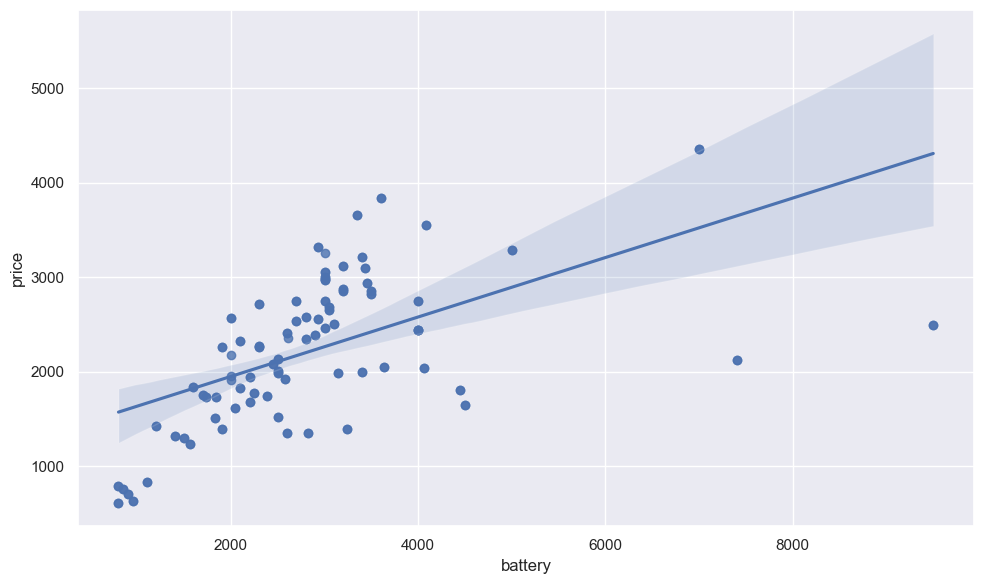

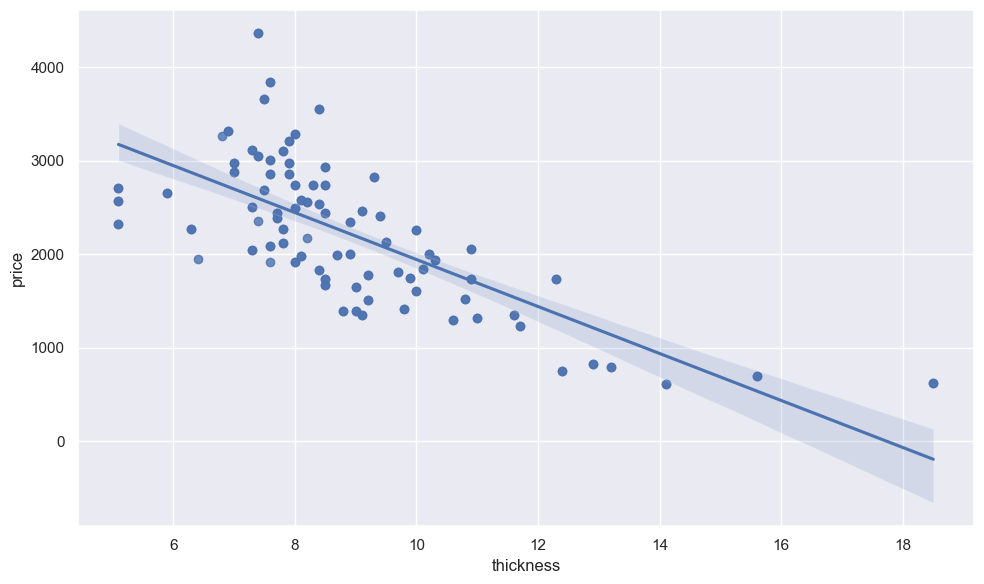

In [538]:
#checking each variable with price value
# there is a linear positive relationship between price and front cam and other variables

def price_vs_var(col):
    plt.figure(figsize=(10,6))
    sns.regplot(x = mobile[col], y = transformed_mobile['price'])
    plt.tight_layout()
    plt.show() 

cols_to_use = [col for col in transformed_mobile.columns if (col !="price")]# and (col !="product_id") and (col !="sale") ]
for col in cols_to_use:
    price_vs_var(col)

## Scattar Plot Visualization between X and Y

<Figure size 1000x600 with 0 Axes>

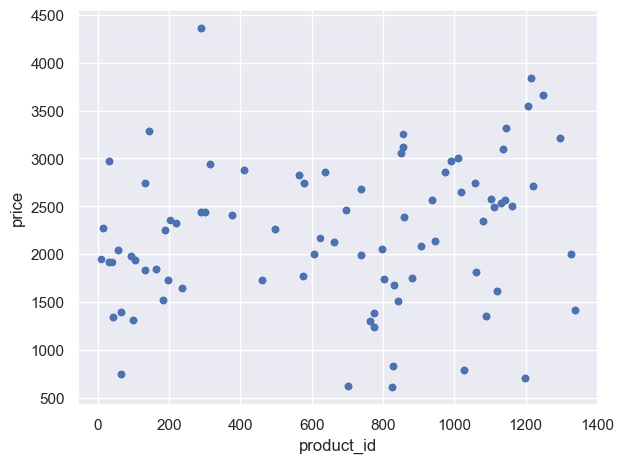

<Figure size 1000x600 with 0 Axes>

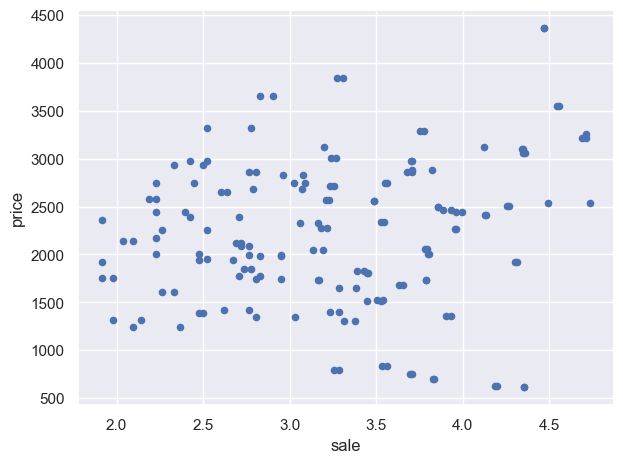

<Figure size 1000x600 with 0 Axes>

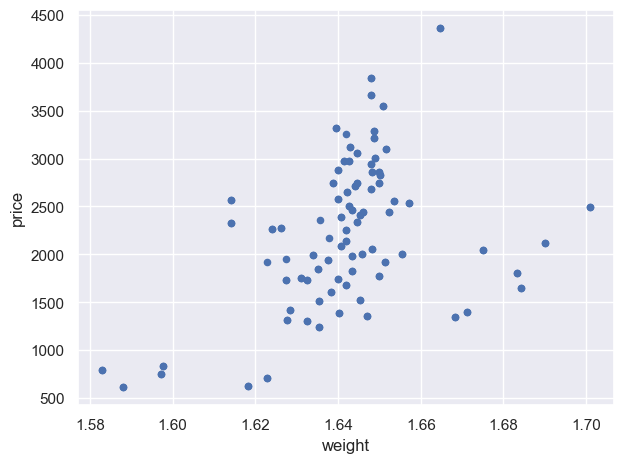

<Figure size 1000x600 with 0 Axes>

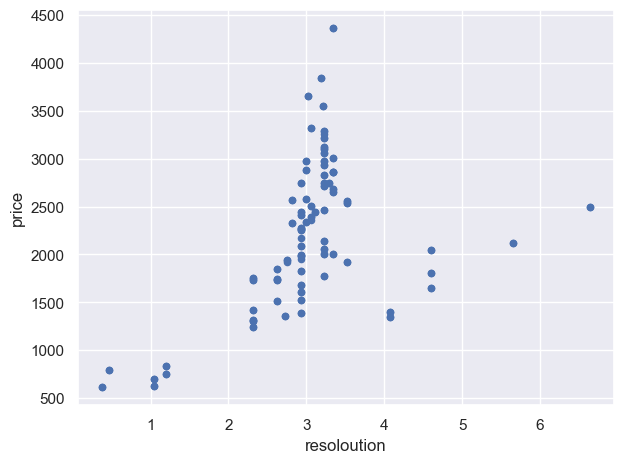

<Figure size 1000x600 with 0 Axes>

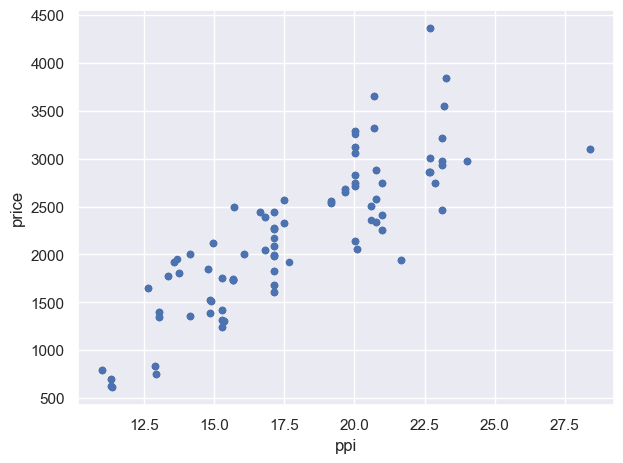

<Figure size 1000x600 with 0 Axes>

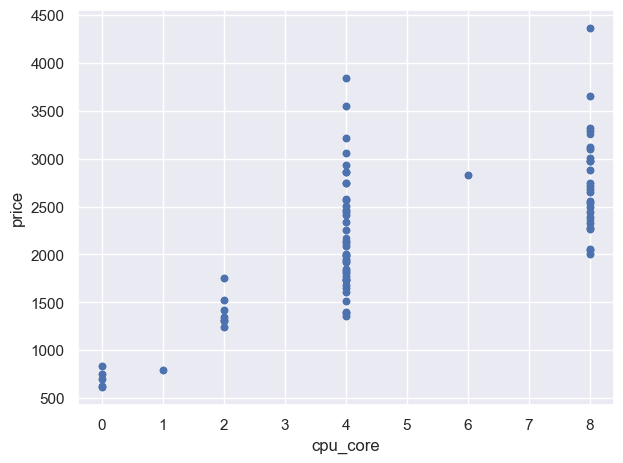

<Figure size 1000x600 with 0 Axes>

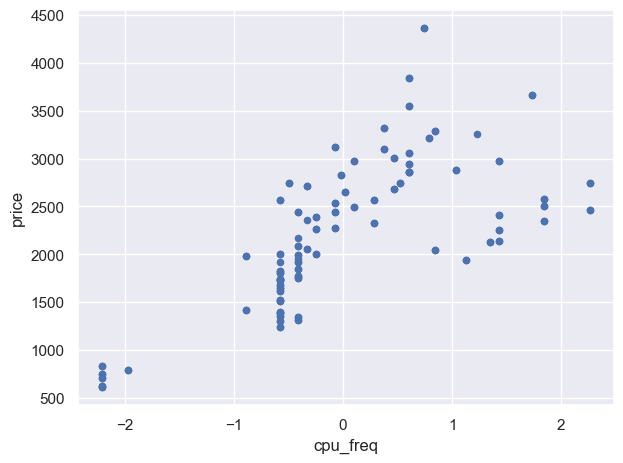

<Figure size 1000x600 with 0 Axes>

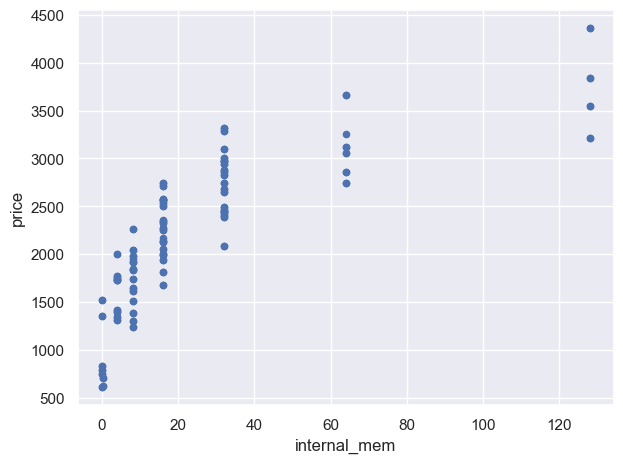

<Figure size 1000x600 with 0 Axes>

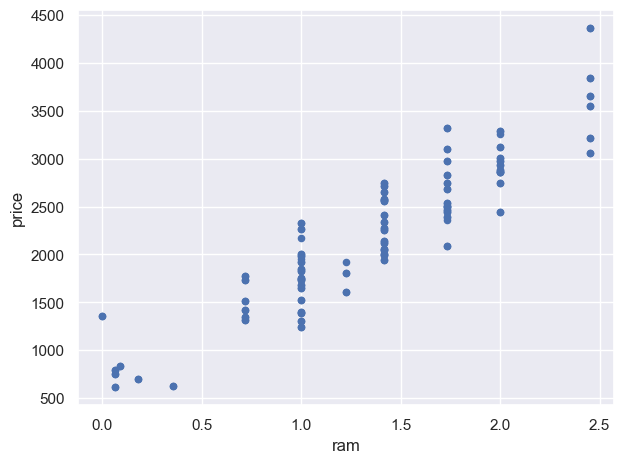

<Figure size 1000x600 with 0 Axes>

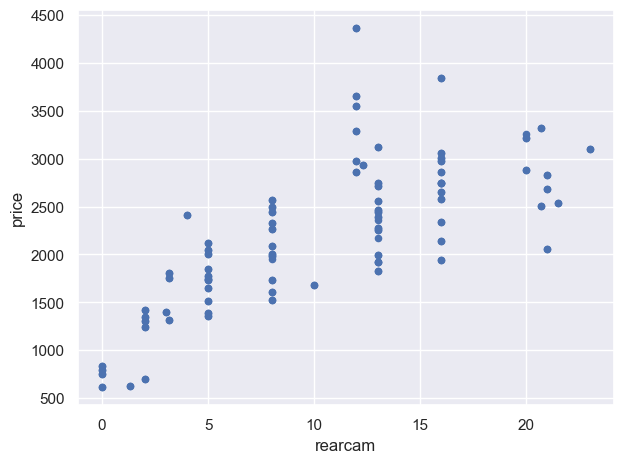

<Figure size 1000x600 with 0 Axes>

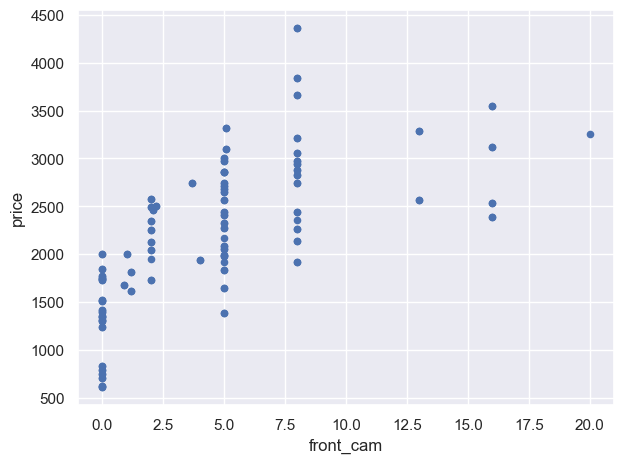

<Figure size 1000x600 with 0 Axes>

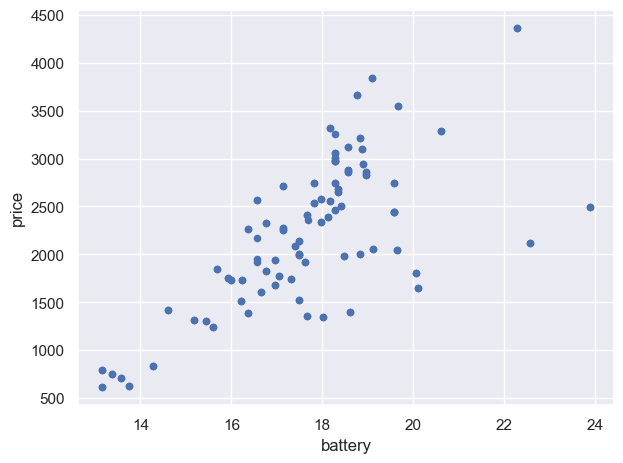

<Figure size 1000x600 with 0 Axes>

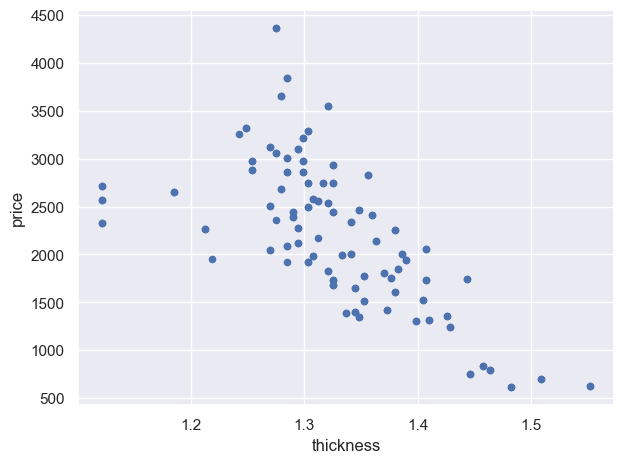

In [541]:
#checking each variable with price value
def price_each_var(col):
    plt.figure(figsize=(10,6))
    transformed_mobile.plot(x=col, y='price', kind='scatter')
    plt.tight_layout()
    plt.show()

cols_to_use = [col for col in transformed_mobile.columns if (col !="price")] #and (col !="product_id") and (col !="sale") ]
for col in cols_to_use:
    price_each_var(col)

All the X variables have poitive relation with price except thickness.

## Pair Plots all numerical columns


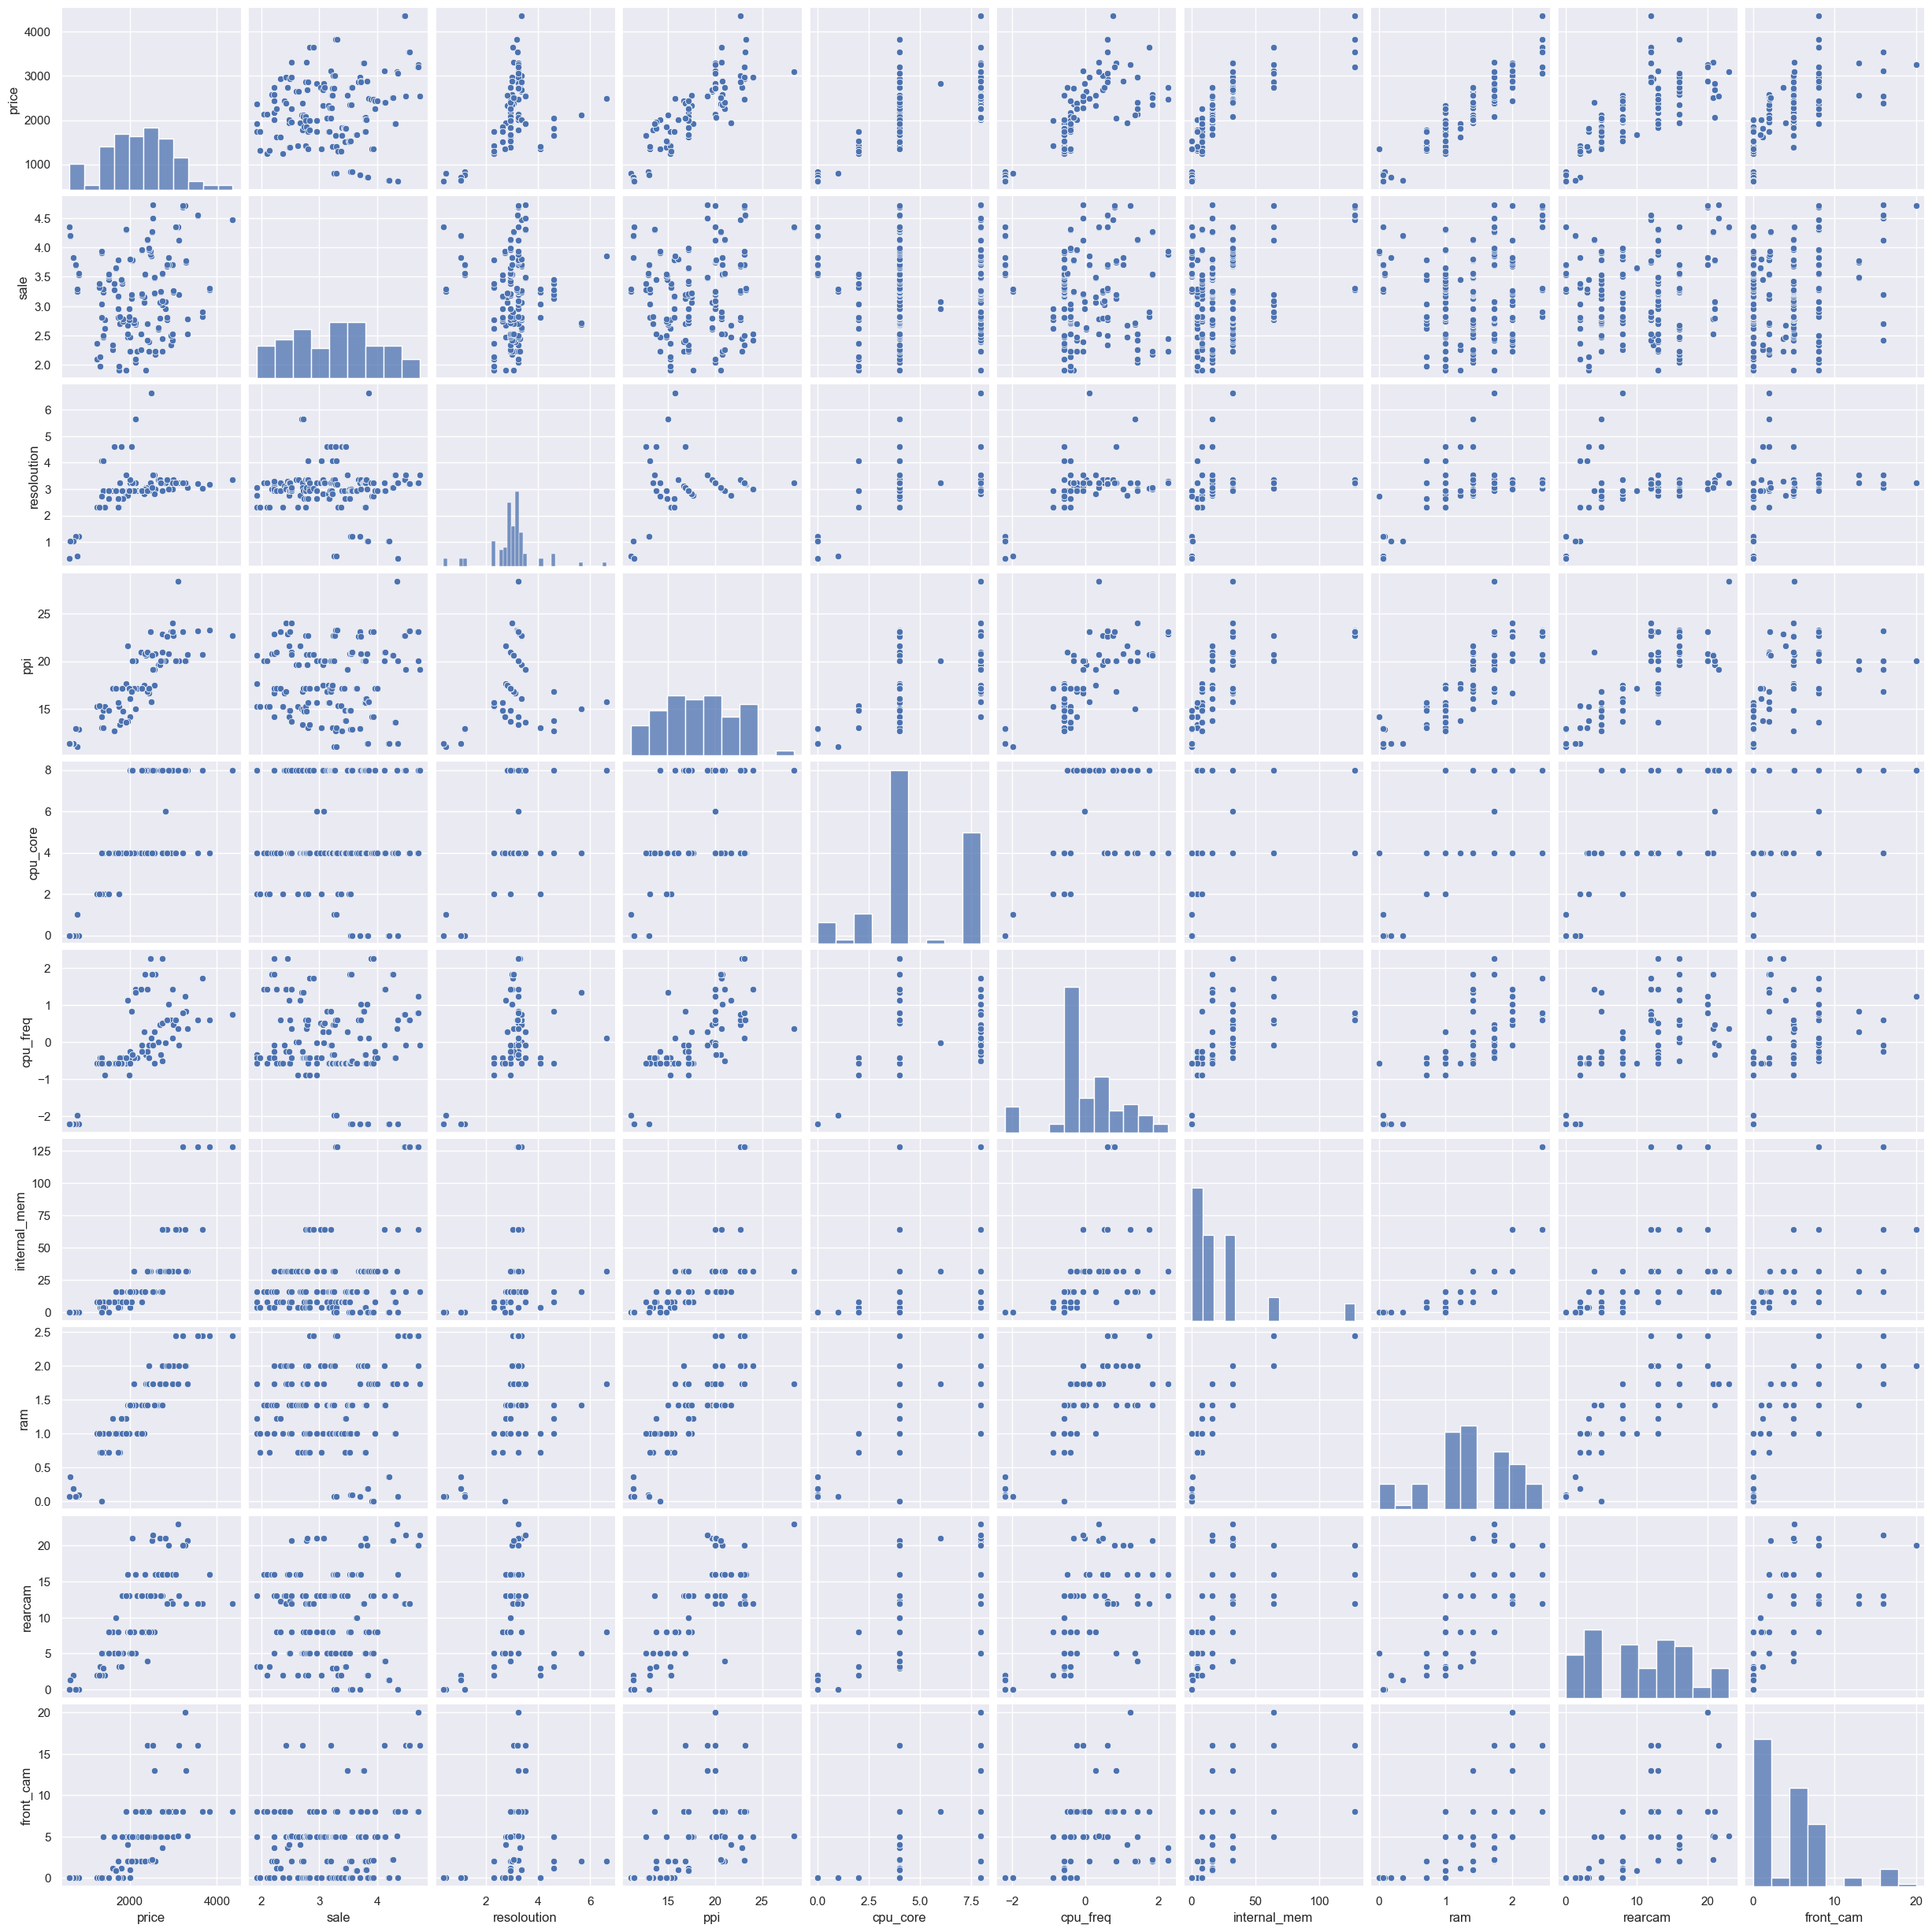

In [544]:
sns.pairplot(transformed_mobile.drop(columns=["product_id", "battery","thickness","weight"]))
plt.show()

## Checking correlation between features

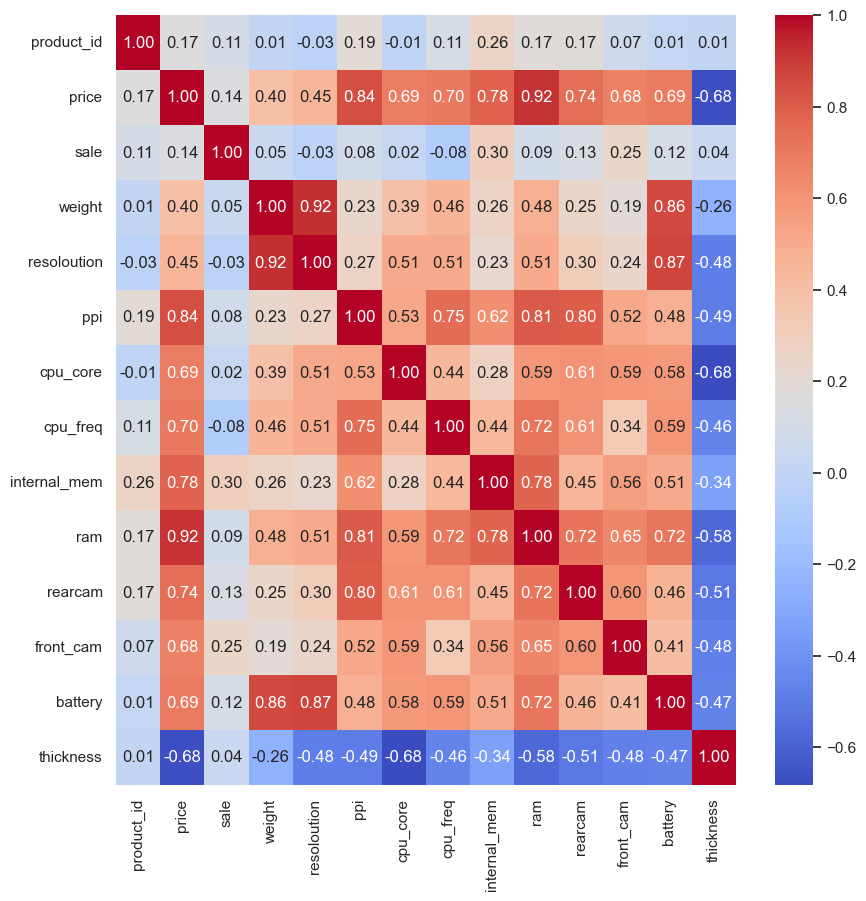

In [547]:
plt.figure(figsize=(10,10))
corr = transformed_mobile.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

In [549]:
transformed_mobile

product_id  price      sale    weight  resoloution        ppi  cpu_core  \
0           203   2357  1.916112  1.635750     3.055651  20.591260         8   
1           880   1749  1.916112  1.631060     2.313017  15.264338         2   
2            40   1916  1.916112  1.622797     2.753595  17.663522         4   
3            99   1315  1.980818  1.627682     2.313017  15.264338         2   
4           880   1749  1.980818  1.631060     2.313017  15.264338         2   
..          ...    ...       ...       ...          ...        ...       ...   
156        1206   3551  4.558555  1.650988     3.209080  23.194827         4   
157        1296   3211  4.688718  1.648619     3.232478  23.108440         4   
158         856   3260  4.709997  1.641844     3.232478  20.024984         8   
159        1296   3211  4.713447  1.648619     3.232478  23.108440         4   
160        1131   2536  4.733807  1.657190     3.520588  19.157244         8   

     cpu_freq  internal_mem       ram  rearcam  front_cam    battery  \
0   -0.329794          16.0  1.732051    13.00        8.0  17.677210   
1   -0.413281           4.0  1.000000     3.15        0.0  15.924109   
2   -0.577348           8.0  1.224745    13.00        5.0  16.572449   
3   -0.413281           4.0  0.715542     3.15        0.0  15.174550   
4   -0.413281           4.0  1.000000     3.15        0.0  15.924109   
..        ...           ...       ...      ...        ...        ...   
156  0.602891         128.0  2.449490    12.00       16.0  19.657282   
157  0.791700         128.0  2.449490    20.00        8.0  18.829491   
158  1.228975          64.0  2.000000    20.00       20.0  18.277079   
159  0.791700         128.0  2.449490    20.00        8.0  18.829491   
160 -0.073631          16.0  1.732051    21.50       16.0  17.821828   

     thickness  
0     1.274815  
1     1.376420  
2     1.284740  
3     1.409768  
4     1.376420  
..         ...  
156   1.320851  
157   1.298919  
158   1.242473  
159   1.298919  
160   1.320851  

[161 rows x 14 columns]

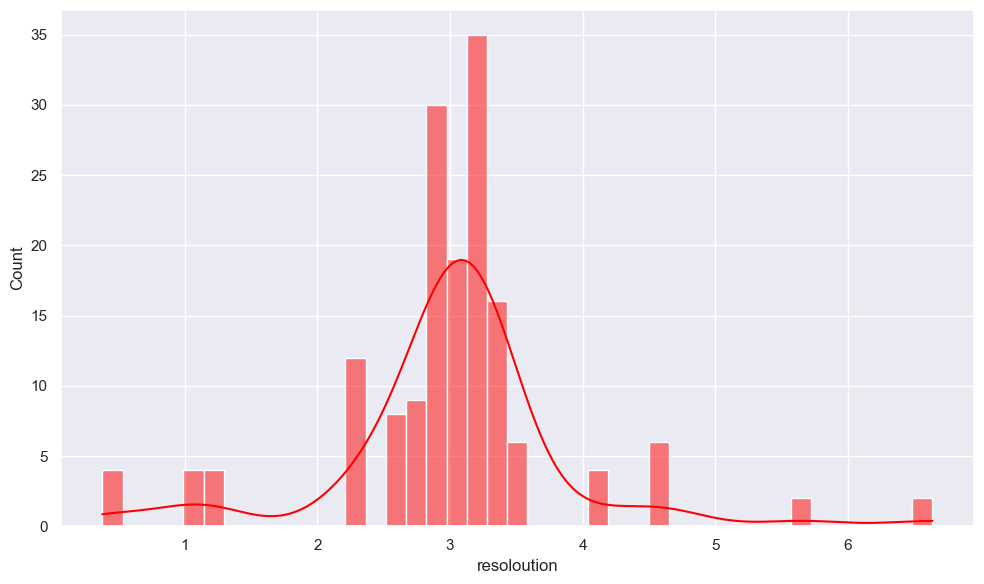

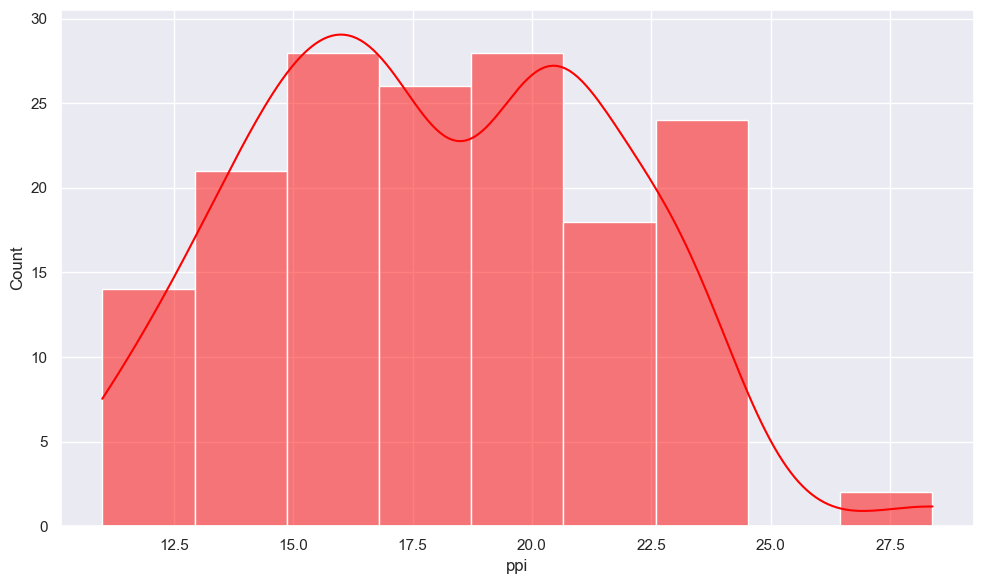

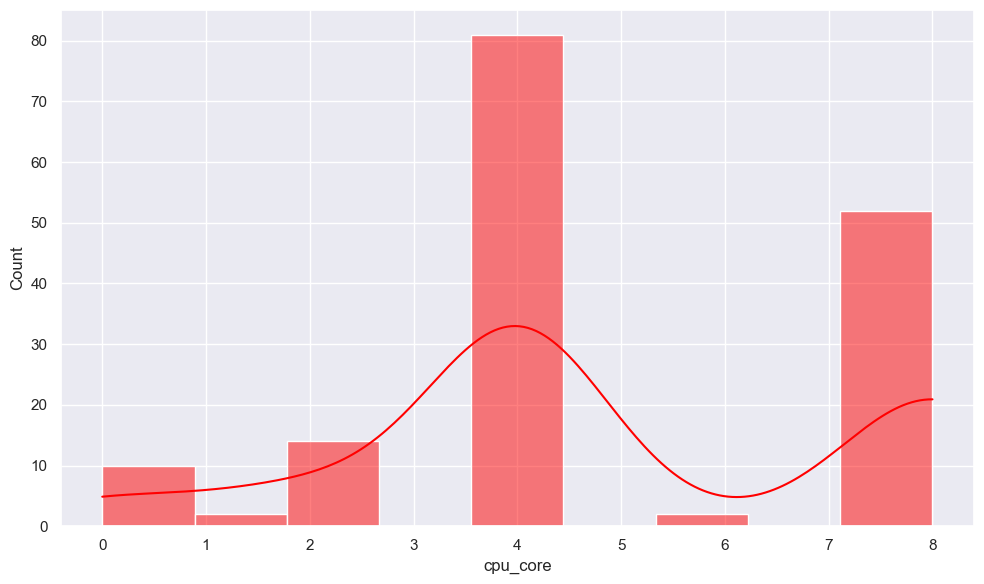

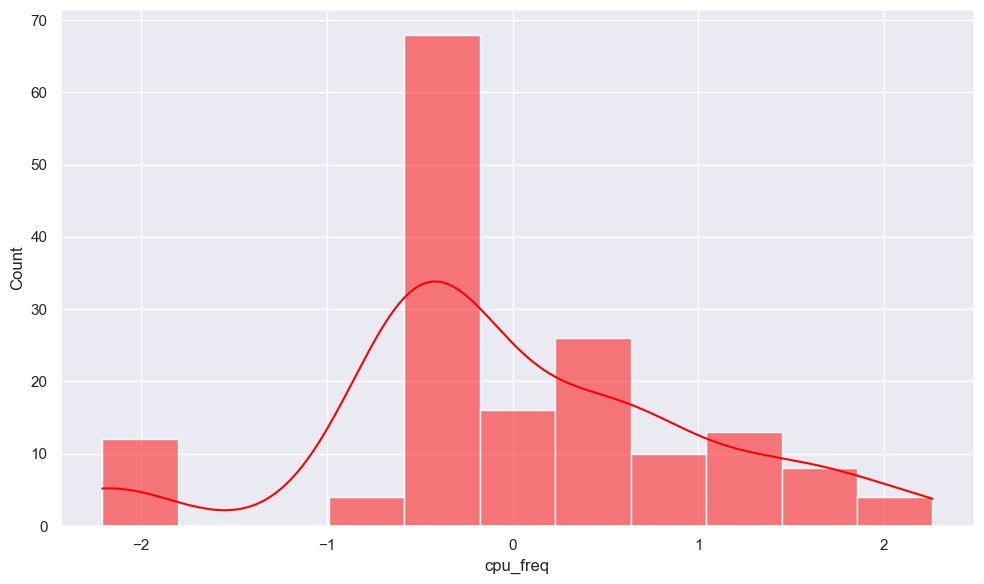

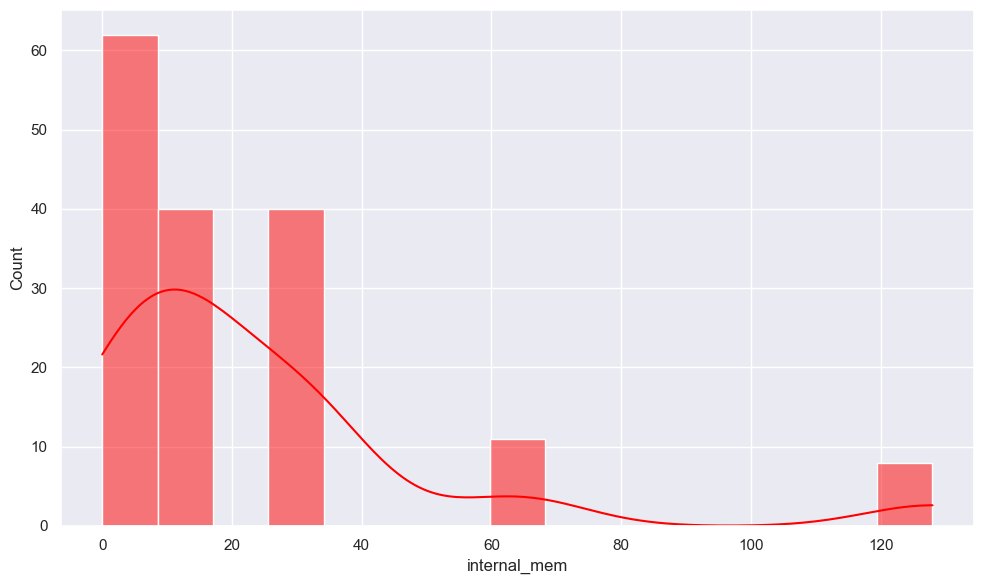

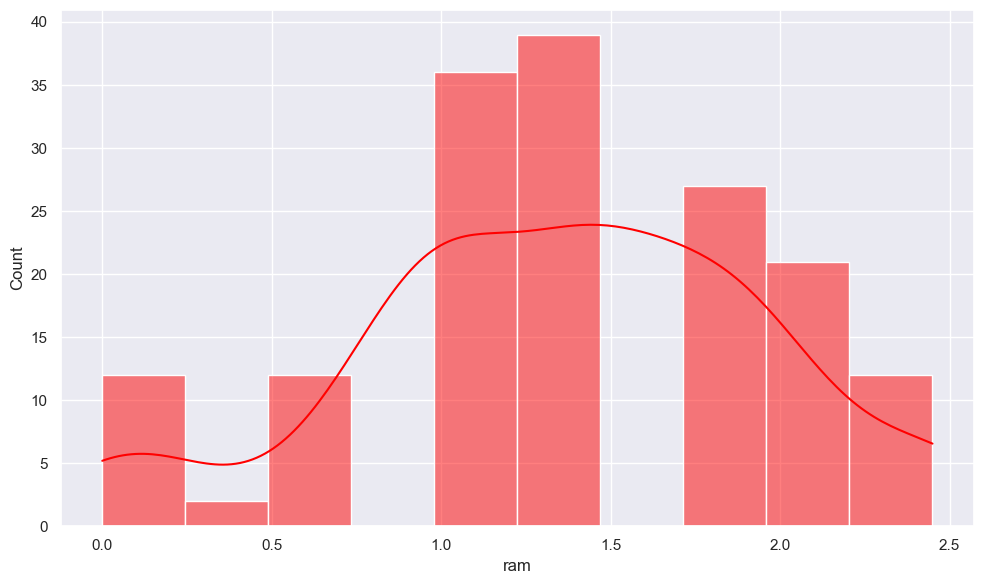

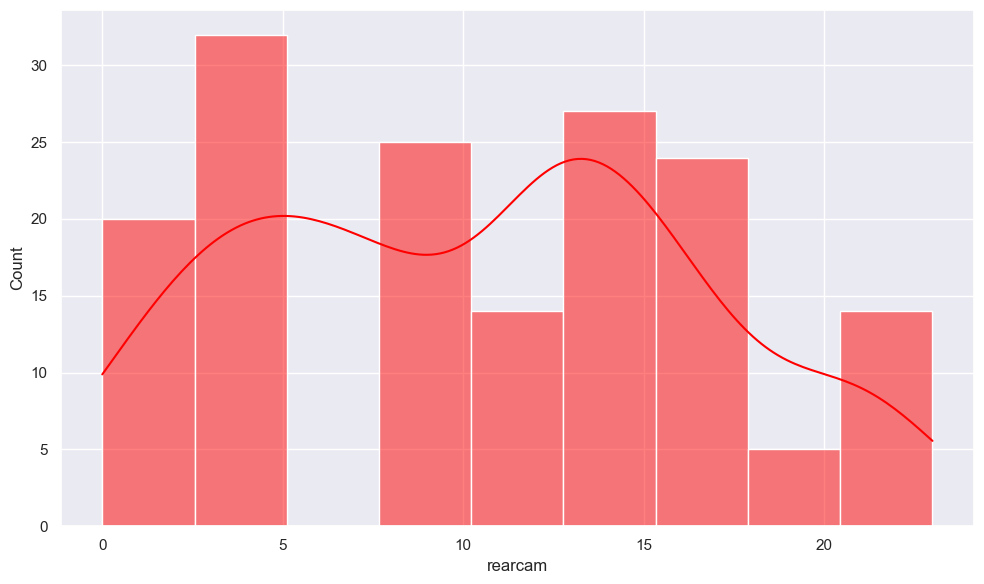

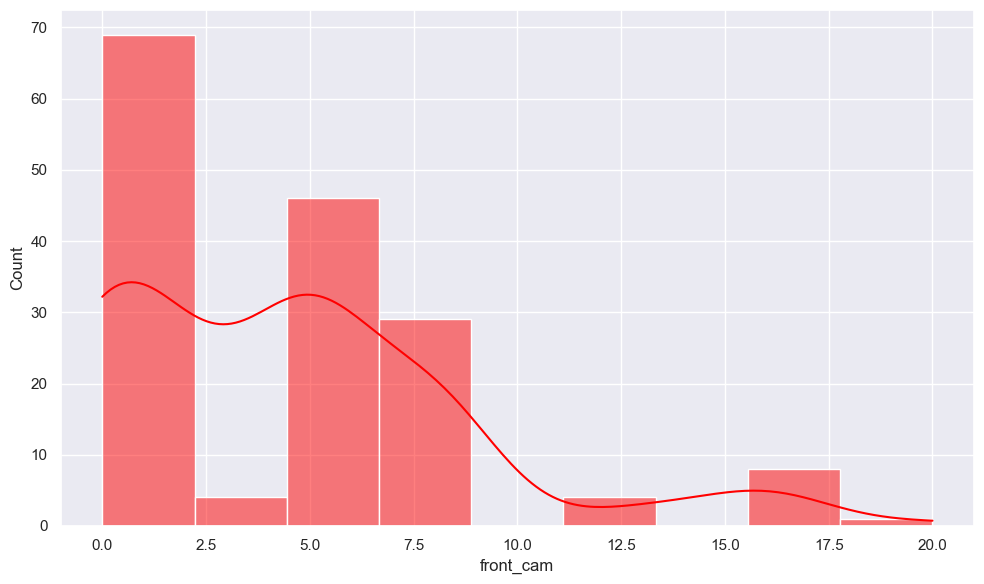

In [550]:
def distribution(col):
    plt.figure(figsize=(10,6))
    sns.histplot(transformed_mobile[col],kde=True,color='red')
    plt.tight_layout()
    plt.show() 

cols_to_use = [col for col in transformed_mobile.columns if  (col !="price") and (col !="product_id") and (col !="sale") and (col !="weight") and (col !="battery") and (col !="thickness") ]
for col in cols_to_use:
    distribution(col)

In [551]:
mobile.shape

(161, 14)

## Scaling the data

In [554]:
scale = MinMaxScaler()
#scale = StandardScaler()
scaled_mobile = pd.DataFrame(scale.fit_transform(transformed_mobile), columns=transformed_mobile.columns, index=transformed_mobile.index)
#scaled_mobile = pd.DataFrame(scale.fit_transform(mobile), columns=mobile.columns, index=mobile.index)

scaled_mobile.drop(columns="product_id",axis=1,inplace=True)
scaled_mobile

price      sale    weight  resoloution       ppi  cpu_core  cpu_freq  \
0    0.465172  0.000000  0.447750     0.427746  0.551534      1.00  0.420355   
1    0.302909  0.000000  0.407951     0.309095  0.245216      0.25  0.401670   
2    0.347478  0.000000  0.337826     0.379487  0.383178      0.50  0.364949   
3    0.187083  0.022964  0.379282     0.309095  0.245216      0.25  0.401670   
4    0.302909  0.022964  0.407951     0.309095  0.245216      0.25  0.401670   
..        ...       ...       ...          ...       ...       ...       ...   
156  0.783827  0.937803  0.577051     0.452260  0.701250      0.50  0.629106   
157  0.693088  0.983998  0.556947     0.455998  0.696282      0.50  0.671364   
158  0.706165  0.991550  0.499456     0.455998  0.518971      1.00  0.769233   
159  0.693088  0.992774  0.556947     0.455998  0.696282      0.50  0.671364   
160  0.512944  1.000000  0.629685     0.502029  0.469073      1.00  0.477689   

     internal_mem       ram   rearcam  front_cam   battery  thickness  
0         0.12500  0.707107  0.565217       0.40  0.421518   0.356233  
1         0.03125  0.408248  0.136957       0.00  0.258000   0.592821  
2         0.06250  0.500000  0.565217       0.25  0.318473   0.379344  
3         0.03125  0.292119  0.136957       0.00  0.188086   0.670472  
4         0.03125  0.408248  0.136957       0.00  0.258000   0.592821  
..            ...       ...       ...        ...       ...        ...  
156       1.00000  1.000000  0.521739       0.80  0.606206   0.463428  
157       1.00000  1.000000  0.869565       0.40  0.528995   0.412360  
158       0.50000  0.816497  0.869565       1.00  0.477470   0.280924  
159       1.00000  1.000000  0.869565       0.40  0.528995   0.412360  
160       0.12500  0.707107  0.934783       0.80  0.435007   0.463428  

[161 rows x 13 columns]

In [555]:
train, validation = train_test_split(scaled_mobile,train_size=0.75, random_state=1)

In [556]:
x_train = train.drop(["price"],axis=1)
y_train =train["price"]

x_validation = validation.drop(["price"],axis=1)
y_validation = validation["price"]

## Linear Regression model

In [558]:

linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

predict_train_data = linear_model.predict(x_train)
predict_validate_data = linear_model.predict(x_validation)

# MSE for train and test
mse_validate = mean_squared_error(y_validation,predict_validate_data)   #Test Error
mse_train = mean_squared_error(y_train,predict_train_data)              #Train Error

# R2 for train and test
r2_validate = r2_score(y_validation,predict_validate_data)
r2_train = r2_score(y_train,predict_train_data)

# RMSE for train and test
rmse_train = np.sqrt(mean_squared_error(y_train,predict_train_data))
rmse_validate = np.sqrt(mean_squared_error(y_validation,predict_validate_data))

coefficients = pd.Series(linear_model.coef_, index=pd.DataFrame(x_train).columns)
features_linear = coefficients[coefficients != 0].sort_values(key=np.abs, ascending=False)

mask_train = y_train != 0
mape_train = np.mean(np.abs((y_train[mask_train] - predict_train_data[mask_train]) / y_train[mask_train])) * 100

mask_validate = y_validation != 0
mape_test = np.mean(np.abs((y_validation[mask_validate] - predict_validate_data[mask_validate]) / y_validation[mask_validate])) * 100


def perf_linear():
    print("\nAccuracy Scores for Linear Regression model on tranaformed and Scaled data::")
    print("->mean square error_train_data:", mse_train)
    print("->mean square error_test_data:", mse_validate)

    print("->rmse square error_train_data:", rmse_train)
    print("->rmse square error_test_data:", rmse_validate)
    
    print("->r2 square error_train_data:", r2_train)
    print("->r2 square error_test_data:", r2_validate)

    print("->MAPE_Train Error(Mean Absolute Percventage Error):",mape_train)
    print("->MAPE_test Error(Mean Absolute Percventage Error)", mape_test)

    #print("Coefficints are:\n",coefficients)
    #print("\nCoefficints are:\n",features_linear)

perf_linear()

#perf(mse_train,mse_validate,"mse","linear_modelar")


Accuracy Scores for Linear Regression model on tranaformed and Scaled data::
->mean square error_train_data: 0.0019613542139645195
->mean square error_test_data: 0.00198466108400742
->rmse square error_train_data: 0.044287178889205844
->rmse square error_test_data: 0.04454953517162014
->r2 square error_train_data: 0.954485534316148
->r2 square error_test_data: 0.9454255767360591
->MAPE_Train Error(Mean Absolute Percventage Error): 11.119805765718377
->MAPE_test Error(Mean Absolute Percventage Error) 14.1019619800077


In [568]:
# Cross Validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lin_model = LinearRegression()

cv_r2_scores = cross_val_score(lin_model, x_train, y_train, scoring='r2', cv=kf)
cv_mse_scores = -cross_val_score(lin_model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf)

print("Cross-validated R² scores:", cv_r2_scores)
print("Average R²:", np.mean(cv_r2_scores))
print("Average MSE:", np.mean(cv_mse_scores))

Cross-validated R² scores: [0.95141148 0.92733509 0.93684261 0.95149104 0.91995478]
Average R²: 0.9374070006970416
Average MSE: 0.0025474313231428217


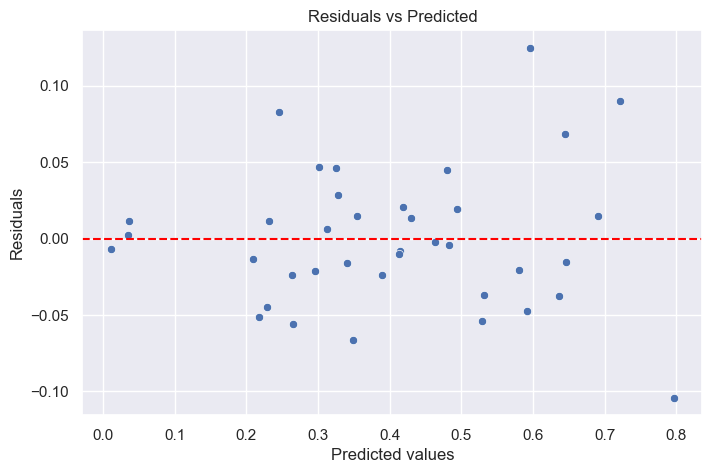

In [572]:
# Residual Analysis - Fit base Linear Regression
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_validation)

residuals = y_validation - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


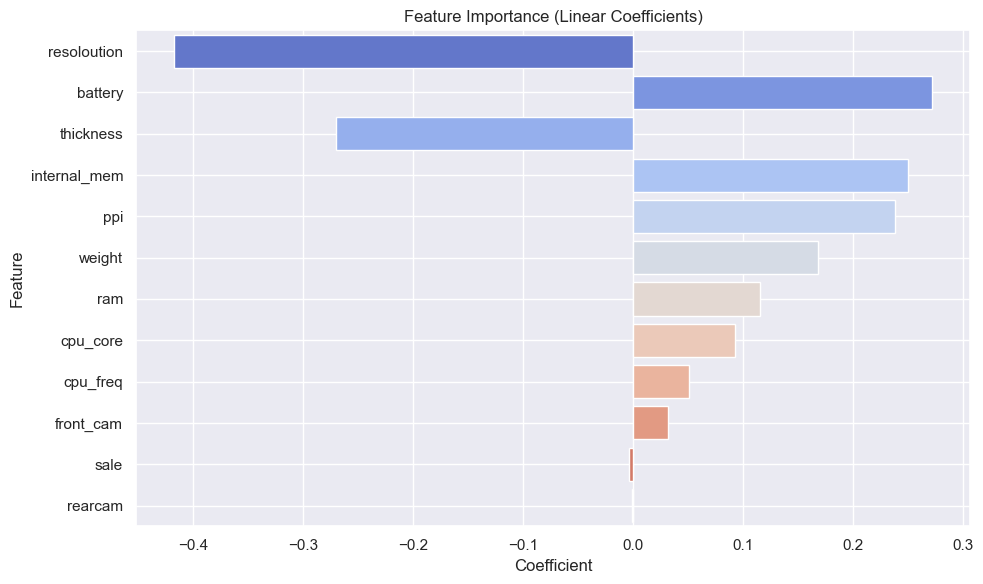

In [574]:
# Assuming you have column names in X_train
feature_names = x_train.columns
coefficients = lin_model.coef_

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Feature Importance (Linear Coefficients)")
plt.grid(True)
plt.tight_layout()
plt.show()

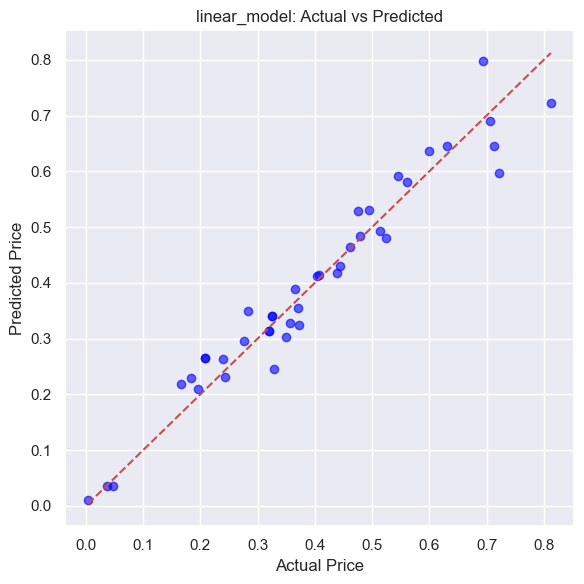

In [576]:
#linear_model  actual v/s Predicted comparison
y_pred = linear_model.predict(x_validation)
plt.figure(figsize=(6, 6))
plt.scatter(y_validation, y_pred, alpha=0.6, color='blue')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("linear_model: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## Grid Search for Hyperparameter Tuning in Lasso Regression


In [307]:
#Approach1# Define a wide range of alpha values on a log scale
alphas = np.logspace(-4, 2, 100)  # 0.0001 to 100

best_score = float('-inf')
best_alpha = None

# Loop through alphas and use cross-validation to find the best
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    # Use negative MSE as scoring (standard in sklearn)
    scores = cross_val_score(lasso, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    #scores = cross_val_score(lasso, x_train, y_train, cv=5, scoring='r2')
    mean_score = scores.mean()

    if mean_score > best_score:  # since scores are negative
        best_score = mean_score
        best_alpha = alpha

print(f"Best Alpha: {best_alpha}")
print(f"Best Cross-Validation Score (Negative MSE): {best_score}")
print(f"Actual MSE: {abs(best_score)}")


Best Alpha: 0.001873817422860383
Best Cross-Validation Score (Negative MSE): -0.0582401783954503
Actual MSE: 0.0582401783954503


In [308]:
#Approach2 # To be used with Lasso() not with LassoCV()

lassol1 = Lasso()
alpha_range = {'alpha': [0.01, 0.1, .2,.3,.4,.5,.6,.7,.8,.9,1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=lassol1, param_grid=alpha_range, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print("Best Alpha:", best_alpha)
print("Best Cross-Validation Score:", best_score)

Best Alpha: 0.01
Best Cross-Validation Score: -0.06110543220397663


## Lasso Regression (L1 Regularization)

In [310]:
#lasso = Lasso(alpha=0.0012328467394420659)   #You already found a good alpha from LassoCV
lasso = LassoCV(cv=5)     #Use **LassoCV** for most real-world use cases — it gives you the best balance between model simplicity and predictive power.
lasso.fit(x_train,y_train)

lasso_predict_train_data = lasso.predict(x_train)
lasso_predict_validate_data = lasso.predict(x_validation)

coefficients = pd.Series(lasso.coef_, index=pd.DataFrame(x_train).columns)
features_lasso = coefficients[coefficients != 0].sort_values(key=np.abs, ascending=False)

lasso_mse_validate = mean_squared_error(y_validation,lasso_predict_validate_data)  #  Test Error
lasso_mse_train = mean_squared_error(y_train,lasso_predict_train_data)             #  Train Error

lasso_r2_validate = r2_score(y_validation,lasso_predict_validate_data)
lasso_r2_train = r2_score(y_train,lasso_predict_train_data)

#print("Coefficints are:\n",coefficients)
#print("\nCoefficints are:\n",features_lasso)

def perf_lasso():
    print("\nAccuracy Scores for Lasso Regression (L1 Regularization) model on raw data::")
    if(hasattr(lasso, "alpha")):
        print("->Alpha are:",lasso.alpha)
    if(hasattr(lasso, "alpha_")):
        print("->Alpha are:",lasso.alpha_)
    #print("->Alpha are:",lasso.alpha)
    print("->lasso_mean square error_train_data:", lasso_mse_train)
    print("->lasso_mean square error_test_data:", lasso_mse_validate)
    
    print("->lasso_r2 square error_train_data:", lasso_r2_train)
    print("->lasso_r2 square error_test_data:", lasso_r2_validate)
perf_lasso()
print("\nMSE Value are : \nLess than 0 -> Good \n1-2-->Better\n2-3 -> Average")


Accuracy Scores for Lasso Regression (L1 Regularization) model on raw data::
->Alpha are: 0.001937429154662541
->lasso_mean square error_train_data: 0.04720653776478876
->lasso_mean square error_test_data: 0.048129058821492286
->lasso_r2 square error_train_data: 0.9542431218962645
->lasso_r2 square error_test_data: 0.9447196237379488

MSE Value are : 
Less than 0 -> Good 
1-2-->Better
2-3 -> Average


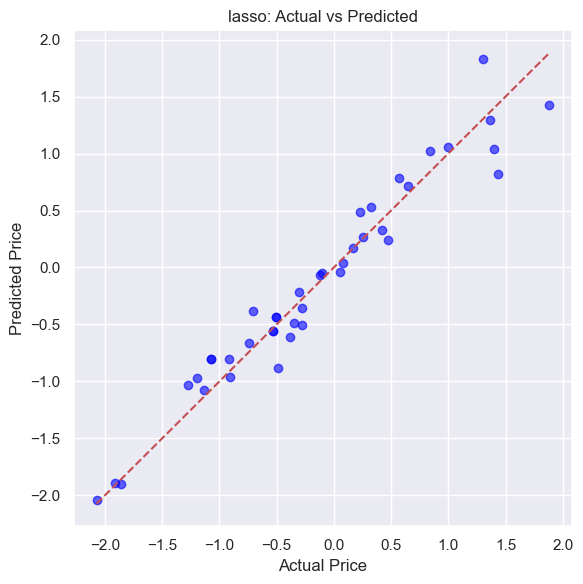

In [311]:
#lasso  actual v/s Predicted comparison

y_pred = lasso.predict(x_validation)
plt.figure(figsize=(6, 6))
plt.scatter(y_validation, y_pred, alpha=0.6, color='blue')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("lasso: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## Grid Search for Hyperparameter Tuning in Ridge Regression

In [313]:
#Approach1# Define a wide range of alpha values on a log scale
alphas = np.logspace(-4, 2, 100)  # 0.0001 to 100

best_score = float('-inf')
best_alpha = None
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through alphas and use cross-validation to find the best
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    # Use negative MSE as scoring (standard in sklearn)
    scores = cross_val_score(ridge, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    #scores = cross_val_score(ridge, x_train, y_train, cv=5, scoring='r2')
    mean_score = scores.mean()

    if mean_score > best_score:  # since scores are negative
        best_score = mean_score
        best_alpha = alpha

print(f"Best Alpha: {kfold}")
print(f"Best Alpha: {best_alpha}")
print(f"Best Cross-Validation Score (Negative MSE): {best_score}")
print(f"Actual MSE: {abs(best_score)}")


Best Alpha: KFold(n_splits=5, random_state=42, shuffle=True)
Best Alpha: 0.6579332246575682
Best Cross-Validation Score (Negative MSE): -0.05844613334592432
Actual MSE: 0.05844613334592432


In [314]:
#Approach2 # To be used with Ridge() not with RidgeCV()

ridge_model = Ridge()
alpha_range = {'alpha': [0.01, 0.1, .2,.3,.4,.5,.6,.7,.8,.9,1, 10, 100, 1000]}
#alpha_range = {'alpha': np.logspace(-4, 2, 100)}
grid_search = GridSearchCV(estimator=ridge_model, param_grid=alpha_range, cv=68, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print("Best Alpha:", best_alpha)
print("Best Cross-Validation Score:", best_score)

Best Alpha: 1
Best Cross-Validation Score: -0.056875995313714116


## Ridge Regression (L2 Regularization)

In [316]:
ridge = Ridge(alpha=10.722672220103231)
#ridge = RidgeCV(cv=5)
ridge.fit(x_train,y_train)

ridge_predict_train_data = ridge.predict(x_train)
ridge_predict_validate_data = ridge.predict(x_validation)

coefficients = pd.Series(ridge.coef_, index=x_train.columns)
features_ridge = coefficients[coefficients != 0].sort_values(key=np.abs, ascending=False)

ridge_mse_validate = mean_squared_error(y_validation,ridge_predict_validate_data)  #  Test Error
ridge_mse_train = mean_squared_error(y_train,ridge_predict_train_data)             #  Train Error

ridge_r2_validate = r2_score(y_validation,predict_validate_data)
ridge_r2_train = r2_score(y_train,predict_train_data)

#print("Coefficints are:\n",coefficients)
#print("\nCoefficints are:\n",features_ridge)

def perf_ridge():
    
    print("\nAccuracy Scores for ridge Regression (L2 Regularization) model on raw data::")
    if(hasattr(lasso, "alpha")):
        print("->Alpha are:",lasso.alpha)
    if(hasattr(lasso, "alpha_")):
        print("->Alpha are:",lasso.alpha_)
    
    print("->ridge_mean square error_train_data:", ridge_mse_train)
    print("->ridge_mean square error_test_data:", ridge_mse_validate)
    
    print("->ridge_r2 square error_train_data:", ridge_r2_train)
    print("->ridge_r2 square error_test_data:", ridge_r2_validate)

perf_ridge()

print("\nMSE Value are : \nLess than 0 -> Good \n1-2-->Better\n2-3 -> Average")


Accuracy Scores for ridge Regression (L2 Regularization) model on raw data::
->Alpha are: 0.001937429154662541
->ridge_mean square error_train_data: 0.051141515111642215
->ridge_mean square error_test_data: 0.05118433618925081
->ridge_r2 square error_train_data: 0.954485534316148
->ridge_r2 square error_test_data: 0.9454255767360592

MSE Value are : 
Less than 0 -> Good 
1-2-->Better
2-3 -> Average


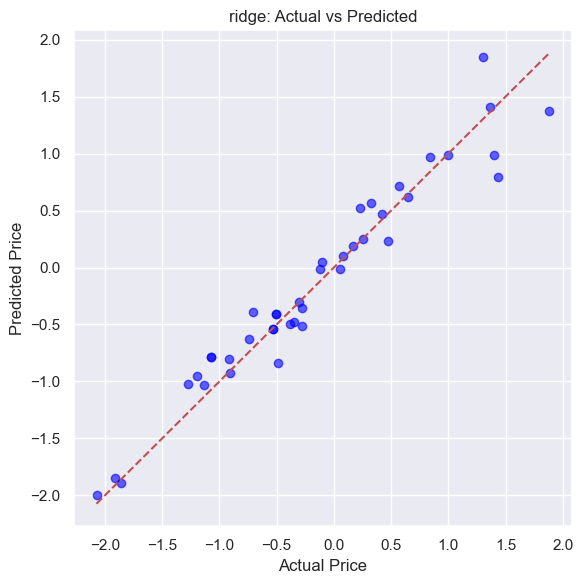

In [317]:
#ridge  actual v/s Predicted comparison

y_pred = ridge.predict(x_validation)
plt.figure(figsize=(6, 6))
plt.scatter(y_validation, y_pred, alpha=0.6, color='blue')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("ridge: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## Grid Search for Hyperparameter Tuning in ElasticNet Regression

In [319]:
#Approach1# Define a wide range of alpha values on a log scale
alphas = np.logspace(-4, 2, 100)  # 0.0001 to 100

best_score = float('-inf')
best_alpha = None
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Loop through alphas and use cross-validation to find the best
for alpha in alphas:
    elastic = ElasticNet(alpha=alpha)
    # Use negative MSE as scoring (standard in sklearn)
    scores = cross_val_score(elastic, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    #scores = cross_val_score(elastic, x_train, y_train, cv=5, scoring='r2')
    mean_score = scores.mean()

    if mean_score > best_score:  # since scores are negative
        best_score = mean_score
        best_alpha = alpha

print(f"Best KFold: {kfold}")
print(f"Best Alpha: {best_alpha}")
print(f"Best Cross-Validation Score (Negative MSE): {best_score}")
print(f"Actual MSE: {abs(best_score)}")


Best KFold: KFold(n_splits=5, random_state=42, shuffle=True)
Best Alpha: 0.0037649358067924675
Best Cross-Validation Score (Negative MSE): -0.060494964938934956
Actual MSE: 0.060494964938934956


In [320]:
#Grid Search for Hyperparameter Tuning in Elastic net Regression

elastic_model = ElasticNet()
alpha_range = {'alpha': [0.01,0.02,0.04,0.04, 0.1, .2,.3,.4,.5,.6,.7,.8,.9,1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=elastic_model, param_grid=alpha_range, cv=68, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print("Best Alpha:", best_alpha)
print("Best Cross-Validation Score:", best_score)

Best Alpha: 0.01
Best Cross-Validation Score: -0.05764721219692914


In [321]:
# Elastic Net Regression (L1 and L2 Regularization)

elastic = ElasticNet(alpha=0.0012328467394420659)
#elastic = ElasticNetCV(cv=5)
elastic.fit(x_train,y_train)

elastic_predict_train_data = elastic.predict(x_train)
elastic_predict_validate_data = elastic.predict(x_validation)

coefficients = pd.Series(elastic.coef_, index=pd.DataFrame(x_train).columns)
features_elastic = coefficients[coefficients != 0].sort_values(key=np.abs, ascending=False)

elastic_mse_validate = mean_squared_error(y_validation,elastic_predict_validate_data)  #  Test Error
elastic_mse_train = mean_squared_error(y_train,elastic_predict_train_data)             #  Train Error

elastic_r2_validate = r2_score(y_validation,elastic_predict_validate_data)
elastic_r2_train = r2_score(y_train,elastic_predict_train_data)

#print("Coefficints are:\n",coefficients)
#print("\nCoefficints are:\n",features_elastic)

print("\nAccuracy Scores for Elastic net Regression (L1 Regularization) model on raw data::")
if(hasattr(lasso, "alpha")):
        print("->Alpha are:",lasso.alpha)
if(hasattr(lasso, "alpha_")):
        print("->Alpha are:",lasso.alpha_)
print("->elastic_mean square error_train_data:", elastic_mse_train)
print("->elastic_mean square error_test_data:", elastic_mse_validate)

print("->elastic_r2 square error_train_data:", elastic_r2_train)
print("->elastic_r2 square error_test_data:", elastic_r2_validate)

print("\nMSE Value are : \nLess than 0 -> Good \n1-2-->Better\n2-3 -> Average")


Accuracy Scores for Elastic net Regression (L1 Regularization) model on raw data::
->Alpha are: 0.001937429154662541
->elastic_mean square error_train_data: 0.046994164586494594
->elastic_mean square error_test_data: 0.047682534385991446
->elastic_r2 square error_train_data: 0.9544489733332017
->elastic_r2 square error_test_data: 0.9452324955748205

MSE Value are : 
Less than 0 -> Good 
1-2-->Better
2-3 -> Average


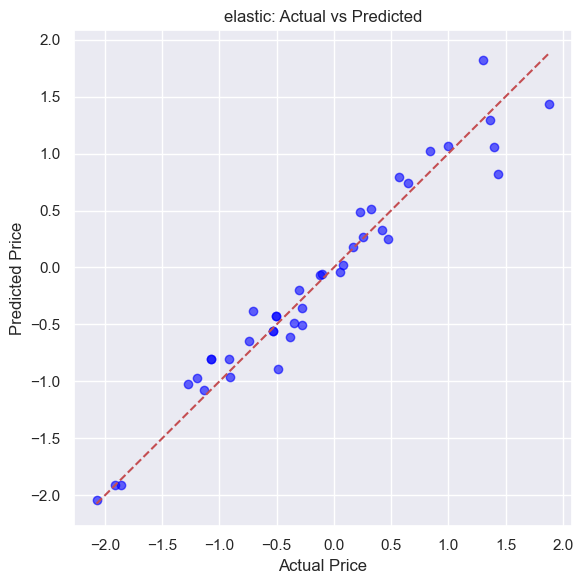

In [322]:
#elastic  actual v/s Predicted comparison

y_pred = elastic.predict(x_validation)
plt.figure(figsize=(6, 6))
plt.scatter(y_validation, y_pred, alpha=0.6, color='blue')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("elastic: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## GridSearchCV for Decision Tree Regressor

In [324]:

dtree = DecisionTreeRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_leaf': [5, 10, 15, 20]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           cv=10,
                           scoring='neg_mean_squared_error',  # or use 'r2'
                           n_jobs=-1)

# Fit to the training data
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 5}
Best MSE Score: 0.11220073073997802


In [325]:
#Approach1# Define a wide range of alpha values on a log scale
alphas = np.logspace(-4, 2, 100)  # 0.0001 to 100

best_score = float('-inf')
best_alpha = None
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Loop through alphas and use cross-validation to find the best
for alpha in alphas:
    #elastic = ElasticNet(alpha=alpha)
    dtree = DecisionTreeRegressor(random_state=42)
    # Use negative MSE as scoring (standard in sklearn)
    scores = cross_val_score(dtree, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    #scores = cross_val_score(elastic, x_train, y_train, cv=5, scoring='r2')
    mean_score = scores.mean()

    if mean_score > best_score:  # since scores are negative
        best_score = mean_score
        best_alpha = alpha

print(f"Best KFold: {kfold}")
print(f"Best Alpha: {best_alpha}")
print(f"Best Cross-Validation Score (Negative MSE): {best_score}")
print(f"Actual MSE: {abs(best_score)}")


Best KFold: KFold(n_splits=5, random_state=42, shuffle=True)
Best Alpha: 0.0001
Best Cross-Validation Score (Negative MSE): -0.11151334733046721
Actual MSE: 0.11151334733046721


In [326]:
# Decission Tree regression - Choosing max depth as 6 after trying different values
dtree = DecisionTreeRegressor(ccp_alpha=0.0001,max_depth=5, min_samples_leaf=10, random_state=42)
dtree.fit(x_train,y_train)

dtree_predict_train_data = dtree.predict(x_train)
dtree_predict_validation_data = dtree.predict(x_validation)

dtree_mse_validate = mean_squared_error(y_validation,dtree_predict_validation_data)  #  Test Error
dtree_mse_train = mean_squared_error(y_train,dtree_predict_train_data)             #  Train Error


dtree_r2_validate = r2_score(y_validation,dtree_predict_validation_data)
dtree_r2_train = r2_score(y_train,dtree_predict_train_data)

r2_scores = cross_val_score(dtree, x_train, y_train, cv=8, scoring='r2')
print("Crooss Val score R² for each fold:", r2_scores)
print("Crooss Val score Average R²:", np.mean(r2_scores))

print("\nAccuracy Scores for Decission Tree regression model on raw data::")
print("->Dtree_mean square error_train_data:", dtree_mse_train)
print("->Dtree_mean square error_test_data:", dtree_mse_validate)

print("->Dtree_r2 square error_train_data:", dtree_r2_train)
print("->Dtree_2 square error_test_data:", dtree_r2_validate)

print("\nMSE Value are : \nLess than 0 -> Good \n1-2-->Better\n2-3 -> Average")

Crooss Val score R² for each fold: [0.83594125 0.85154231 0.84492629 0.72907882 0.86157075 0.84067351
 0.84332579 0.79916829]
Crooss Val score Average R²: 0.825778376939984

Accuracy Scores for Decission Tree regression model on raw data::
->Dtree_mean square error_train_data: 0.08307900212179947
->Dtree_mean square error_test_data: 0.06905736654929776
->Dtree_r2 square error_train_data: 0.919472260558311
->Dtree_2 square error_test_data: 0.9206816567789013

MSE Value are : 
Less than 0 -> Good 
1-2-->Better
2-3 -> Average


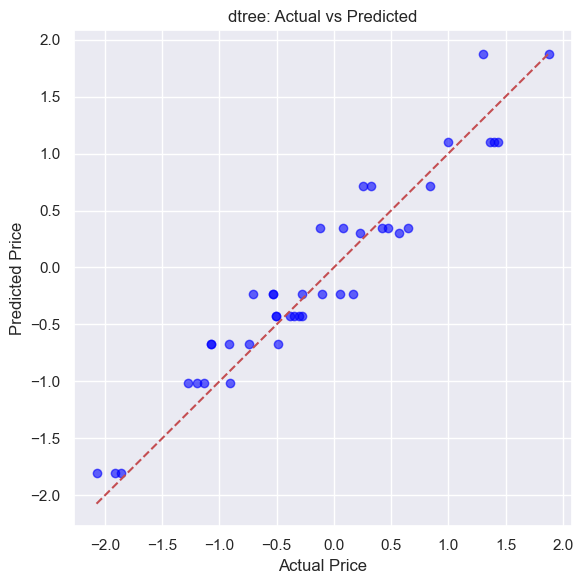

In [327]:
#dtree  actual v/s Predicted comparison

y_pred = dtree.predict(x_validation)
plt.figure(figsize=(6, 6))
plt.scatter(y_validation, y_pred, alpha=0.6, color='blue')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("dtree: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## GridSearchCV for Random Forest Regressor

In [329]:
mobile.shape

(161, 14)

In [330]:
transformed_mobile.shape

(161, 14)

In [331]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100, 150,200,250,300,350,400],
    'max_depth': [3, 5, 7,9,11,13,15,17],
    'min_samples_leaf': [5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

rf_grid_search.fit(x_train, y_train)

print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest CV R² Score:", rf_grid_search.best_score_)


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Random Forest Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 400}
Best Random Forest CV R² Score: 0.9000210004439356


In [332]:
# Random Forest regression - Choosing max depth as 6 after trying different values
# Choosing the parameters after trying different values
rforest = RandomForestRegressor(n_estimators = 400, max_features= "sqrt",min_samples_leaf=5 ,random_state = 1, max_depth = 7)
rforest.fit(x_train,y_train)

rforest_predict_train_data = rforest.predict(x_train)
rforest_predict_validation_data = rforest.predict(x_validation)

rforest_mse_validate = mean_squared_error(y_validation,rforest_predict_validation_data)  #  Test Error
rforest_mse_train = mean_squared_error(y_train,rforest_predict_train_data)             #  Train Error

rforest_r2_validate = r2_score(y_validation,rforest_predict_validation_data)
rforest_r2_train = r2_score(y_train,rforest_predict_train_data)

r2_scores = cross_val_score(rforest, x_train, y_train, cv=8, scoring='r2')
print("Crooss Val score R² for each fold:", r2_scores)
print("Crooss Val score Average R²:", np.mean(r2_scores))

print("\nAccuracy Scores for Random Forest regression model on raw data::")
print("->rforest_mean square error_train_data:", rforest_mse_train)
print("->rforest_mean square error_test_data:", rforest_mse_validate)

print("->rforest_r2 square error_train_data:", rforest_r2_train)
print("->rforest_2 square error_test_data:", rforest_r2_validate)

print("\nMSE Value are : \nLess than 0 -> Good \n1-2-->Better\n2-3 -> Average")

Crooss Val score R² for each fold: [0.92150473 0.9039375  0.88404855 0.86267424 0.92278641 0.87036403
 0.94824632 0.93117947]
Crooss Val score Average R²: 0.9055926560329997

Accuracy Scores for Random Forest regression model on raw data::
->rforest_mean square error_train_data: 0.05883068913223536
->rforest_mean square error_test_data: 0.05394585069382723
->rforest_r2 square error_train_data: 0.9429759351385787
->rforest_2 square error_test_data: 0.9380385364444419

MSE Value are : 
Less than 0 -> Good 
1-2-->Better
2-3 -> Average


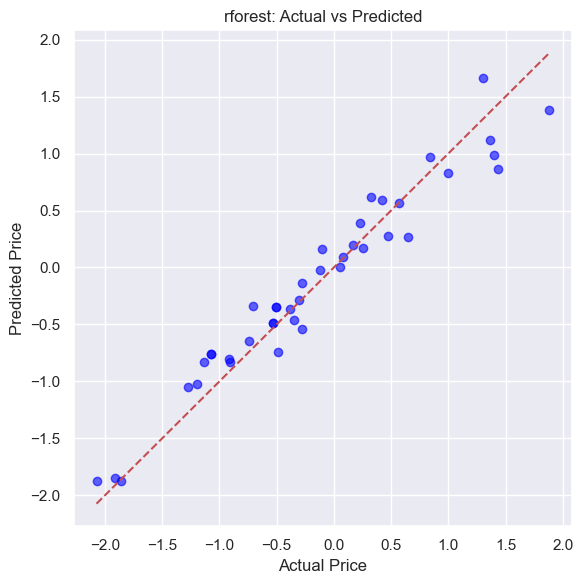

In [333]:
#rforest  actual v/s Predicted comparison

y_pred = rforest.predict(x_validation)
plt.figure(figsize=(6, 6))
plt.scatter(y_validation, y_pred, alpha=0.6, color='blue')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("rforest: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## GridSearchCV for Gradient Boosting Regressor

In [335]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [50, 100, 150,200,250,300,350,400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5,7,9,11,13,15],
    'min_samples_leaf': [5, 10, 20]
}
gb_grid_search = GridSearchCV(
    estimator=gb,
    param_grid=gb_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
gb_grid_search.fit(x_train, y_train)
print("Best Gradient Boosting Parameters:", gb_grid_search.best_params_)
print("Best Gradient Boosting CV R² Score:", gb_grid_search.best_score_)


Fitting 5 folds for each of 504 candidates, totalling 2520 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 10, 'n_estimators': 400}
Best Gradient Boosting CV R² Score: 0.9440350089320837


In [336]:
# Gradient Boosting Regression model
gboost = GradientBoostingRegressor(n_estimators = 400, max_depth = 3,learning_rate=0.01,min_samples_leaf=5, random_state = 42)
gboost.fit(x_train,y_train)

gboost_predict_train_data = gboost.predict(x_train)
gboost_predict_validation_data = gboost.predict(x_validation)

gboost_mse_validate = mean_squared_error(y_validation,gboost_predict_validation_data)  #  Test Error
gboost_mse_train = mean_squared_error(y_train,gboost_predict_train_data)             #  Train Error

gboost_r2_validate = r2_score(y_validation,gboost_predict_validation_data)
gboost_r2_train = r2_score(y_train,gboost_predict_train_data)

r2_scores = cross_val_score(gboost, x_train, y_train, cv=8, scoring='r2')
print("Crooss Val score R² for each fold:", r2_scores)
print("Crooss Val score Average R²:", np.mean(r2_scores))

print("\nAccuracy Scores for Gradient Boosting Regression model on raw data::")
print("->gboost_mean square error_train_data:", gboost_mse_train)
print("->gboost_mean square error_test_data:", gboost_mse_validate)

print("->gboost_r2 square error_train_data:", gboost_r2_train)
print("->gboost_2 square error_test_data:", gboost_r2_validate)

print("\nMSE Value are : \nLess than 0 -> Good \n1-2-->Better\n2-3 -> Average")

Crooss Val score R² for each fold: [0.90881761 0.9376227  0.92767756 0.94866299 0.97292284 0.96944015
 0.95792112 0.94950608]
Crooss Val score Average R²: 0.9465713821799995

Accuracy Scores for Gradient Boosting Regression model on raw data::
->gboost_mean square error_train_data: 0.011740368070725586
->gboost_mean square error_test_data: 0.019826839329139933
->gboost_r2 square error_train_data: 0.9886201654232335
->gboost_2 square error_test_data: 0.9772271645230542

MSE Value are : 
Less than 0 -> Good 
1-2-->Better
2-3 -> Average


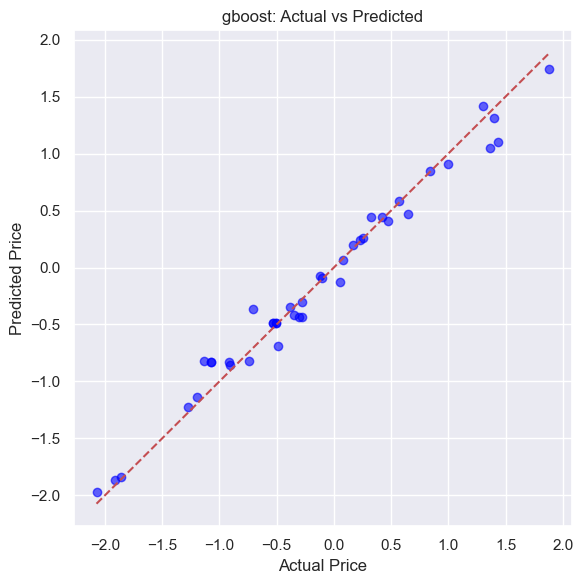

In [337]:
#gboost  actual v/s Predicted comparison

y_pred = gboost.predict(x_validation)
plt.figure(figsize=(6, 6))
plt.scatter(y_validation, y_pred, alpha=0.6, color='blue')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("gboost: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## GridSearchCV for XGBoost Regressor

In [339]:
xgboost = xgb.XGBRegressor(random_state=42)
xgboost_param_grid = {
    'n_estimators': [50, 100, 150,200,250,300,350,400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5,7,9,11,13,15],
    'min_samples_leaf': [5, 10, 20]
}
xgboost_grid_search = GridSearchCV(
    estimator=xgboost,
    param_grid=gb_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
xgboost_grid_search.fit(x_train, y_train)
print("Best XGBoost  Parameters:", xgboost_grid_search.best_params_)
print("Best XGBoost  CV R² Score:", xgboost_grid_search.best_score_)


Fitting 5 folds for each of 504 candidates, totalling 2520 fits
Best XGBoost  Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 400}
Best XGBoost  CV R² Score: 0.9461820721763932


In [340]:
# XGBoost Regression model - Max depth = 2 after testing various values
xgboost = xgb.XGBRegressor(random_state = 111, max_depth = 3)
xgboost.fit(x_train,y_train)

xgboost_predict_train_data = xgboost.predict(x_train)
xgboost_predict_validation_data = xgboost.predict(x_validation)

xgboost_mse_validate = mean_squared_error(y_validation,xgboost_predict_validation_data)  #  Test Error
xgboost_mse_train = mean_squared_error(y_train,xgboost_predict_train_data)             #  Train Error

xgboost_r2_validate = r2_score(y_validation,xgboost_predict_validation_data)
xgboost_r2_train = r2_score(y_train,xgboost_predict_train_data)

r2_scores = cross_val_score(xgboost, x_train, y_train, cv=10, scoring='r2')
print("Crooss Val score R² for each fold:", r2_scores)
print("Crooss Val score Average R²:", np.mean(r2_scores))

print("\nAccuracy Scores for XGBoost Regression model model on raw data::")
print("->xgboost_mean square error_train_data:", xgboost_mse_train)
print("->xgboost_mean square error_test_data:", xgboost_mse_validate)

print("->xgboost_r2 square error_train_data:", xgboost_r2_train)
print("->xgboost_2 square error_test_data:", xgboost_r2_validate)

print("\nMSE Value are : \nLess than 0 -> Good \n1-2-->Better\n2-3 -> Average")

Crooss Val score R² for each fold: [0.93082582 0.89283671 0.95343871 0.96256634 0.95061941 0.99762211
 0.98837231 0.93006074 0.98172435 0.96584668]
Crooss Val score Average R²: 0.9553913159414613

Accuracy Scores for XGBoost Regression model model on raw data::
->xgboost_mean square error_train_data: 3.405619830933873e-05
->xgboost_mean square error_test_data: 0.007269238795067603
->xgboost_r2 square error_train_data: 0.9999669896292229
->xgboost_2 square error_test_data: 0.9916506521097689

MSE Value are : 
Less than 0 -> Good 
1-2-->Better
2-3 -> Average


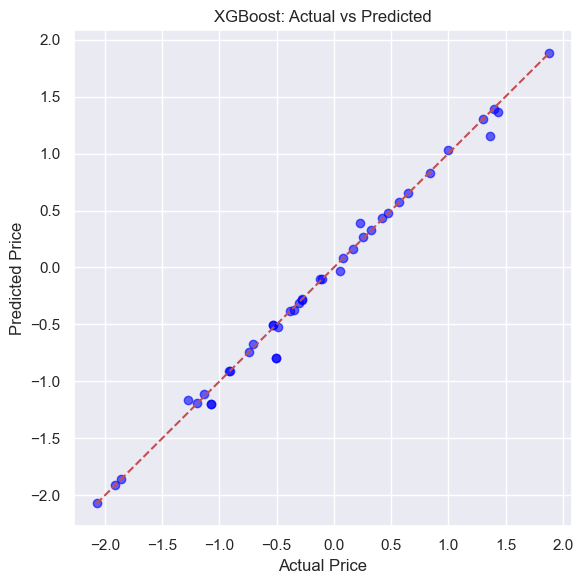

In [341]:
#XbBoost  actual v/s Predicted comparison

y_pred = xgboost.predict(x_validation)
plt.figure(figsize=(6, 6))
plt.scatter(y_validation, y_pred, alpha=0.6, color='blue')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## Support Vector Regression model -linear kernel


In [343]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svr = SVR(kernel="linear")
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best R² Score: 0.9487968790291321


In [344]:
svr_lin = SVR(kernel ="linear",C=100,epsilon=0.01,gamma="scale")
svr_lin.fit(x_train,y_train)

svr_lin_predict_train_data = svr_lin.predict(x_train)
svr_lin_predict_validation_data = svr_lin.predict(x_validation)

svr_lin_mse_validate = mean_squared_error(y_validation,svr_lin_predict_validation_data)  #  Test Error
svr_lin_mse_train = mean_squared_error(y_train,svr_lin_predict_train_data)             #  Train Error

svr_lin_r2_validate = r2_score(y_validation,svr_lin_predict_validation_data)
svr_lin_r2_train = r2_score(y_train,svr_lin_predict_train_data)

print("\nAccuracy Scores for Support Vector Regression model - Linear kernel model on raw data::")
print("->svr_lin_mean square error_train_data:", svr_lin_mse_train)
print("->svr_lin_mean square error_test_data:", svr_lin_mse_validate)

print("->svr_lin_r2 square error_train_data:", svr_lin_r2_train)
print("->svr_lin_2 square error_test_data:", svr_lin_r2_validate)

print("\nMSE Value are : \nLess than 0 -> Good \n1-2-->Better\n2-3 -> Average")


Accuracy Scores for Support Vector Regression model - Linear kernel model on raw data::
->svr_lin_mean square error_train_data: 0.048732979198048525
->svr_lin_mean square error_test_data: 0.05061931787548567
->svr_lin_r2 square error_train_data: 0.9527635557619683
->svr_lin_2 square error_test_data: 0.9418593463740113

MSE Value are : 
Less than 0 -> Good 
1-2-->Better
2-3 -> Average


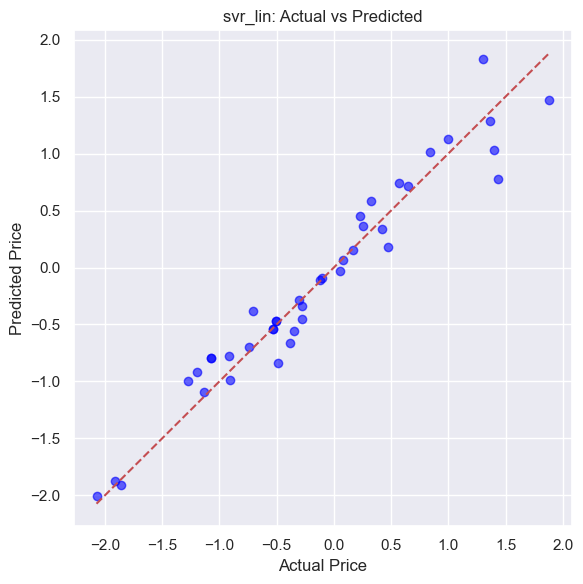

In [345]:
#svr_lin  actual v/s Predicted comparison

y_pred = svr_lin.predict(x_validation)
plt.figure(figsize=(6, 6))
plt.scatter(y_validation, y_pred, alpha=0.6, color='blue')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("svr_lin: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## Support Vector Regression model - Poly kernel


In [347]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define pipeline with scaling and polynomial kernel SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='poly'))
])

# Define hyperparameter grid for tuning
param_grid = {
    'svr__degree': [2, 3, 4],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1],
    'svr__coef0': [0, 1]  # Shifts polynomial curve
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(x_train, y_train)

# Output best hyperparameters and R²
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated R²:", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'svr__C': 1, 'svr__coef0': 1, 'svr__degree': 3, 'svr__epsilon': 0.1}
Best Cross-Validated R²: 0.9594861287135924


In [348]:

svr_poly = SVR(kernel ="poly",epsilon=0.01,gamma="scale",C=0.1,coef0=1,degree=4)
svr_poly.fit(x_train,y_train)

svr_poly_predict_train_data = svr_poly.predict(x_train)
svr_poly_predict_validation_data = svr_poly.predict(x_validation)

svr_poly_mse_validate = mean_squared_error(y_validation,svr_poly_predict_validation_data)  #  Test Error
svr_poly_mse_train = mean_squared_error(y_train,svr_poly_predict_train_data)             #  Train Error

svr_poly_r2_validate = r2_score(y_validation,svr_poly_predict_validation_data)
svr_poly_r2_train = r2_score(y_train,svr_poly_predict_train_data)

print("\nAccuracy Scores for Support Vector Regression model - Poly kernel model on raw data::")
print("->svr_poly_mean square error_train_data:", svr_poly_mse_train)
print("->ssvr_poly_mean square error_test_data:", svr_poly_mse_validate)

print("->svr_poly_r2 square error_train_data:", svr_poly_r2_train)
print("->svr_poly_r2 square error_test_data:", svr_poly_r2_validate)

print("\nMSE Value are : \nLess than 0 -> Good \n1-2-->Better\n2-3 -> Average")


Accuracy Scores for Support Vector Regression model - Poly kernel model on raw data::
->svr_poly_mean square error_train_data: 0.019584964988259065
->ssvr_poly_mean square error_test_data: 0.0330198792235604
->svr_poly_r2 square error_train_data: 0.9810164672508109
->svr_poly_r2 square error_test_data: 0.9620738200101518

MSE Value are : 
Less than 0 -> Good 
1-2-->Better
2-3 -> Average


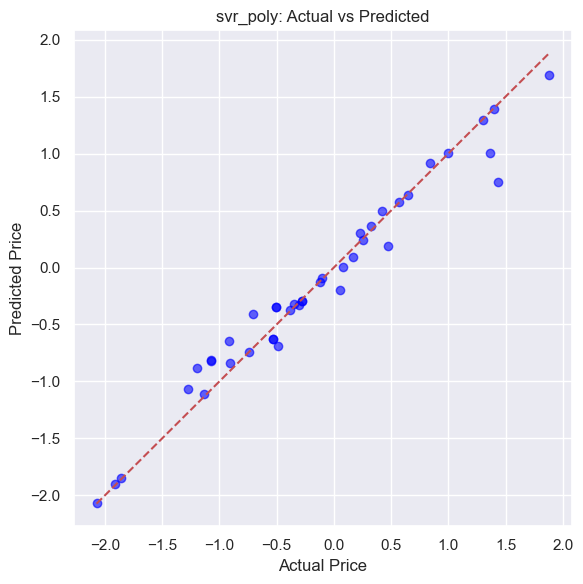

In [349]:
#svr_poly  actual v/s Predicted comparison

y_pred = svr_poly.predict(x_validation)
plt.figure(figsize=(6, 6))
plt.scatter(y_validation, y_pred, alpha=0.6, color='blue')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("svr_poly: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## Support Vector Regression model - RBF kernel


In [351]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define pipeline with scaling and polynomial kernel SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])

# Define hyperparameter grid for tuning
param_grid = {
    'svr__degree': [2, 3, 4],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1],
    'svr__coef0': [0, 1]  # Shifts polynomial curve
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(x_train, y_train)

# Output best hyperparameters and R²
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated R²:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'svr__C': 10, 'svr__coef0': 0, 'svr__degree': 2, 'svr__epsilon': 0.1}
Best Cross-Validated R²: 0.9482193408510741


In [352]:
svr_rbf = SVR(C=10,coef0=0,degree=2,epsilon=0.01,kernel ="rbf")
svr_rbf.fit(x_train,y_train)

svr_rbf_predict_train_data = svr_rbf.predict(x_train)
svr_rbf_predict_validation_data = svr_rbf.predict(x_validation)

svr_rbf_mse_validate = mean_squared_error(y_validation,svr_rbf_predict_validation_data)  #  Test Error
svr_rbf_mse_train = mean_squared_error(y_train,svr_rbf_predict_train_data)             #  Train Error

svr_rbf_r2_validate = r2_score(y_validation,svr_rbf_predict_validation_data)
svr_rbf_r2_train = r2_score(y_train,svr_rbf_predict_train_data)

print("\nAccuracy Scores for Support Vector Regression model - RBF kernel model on raw data::")
print("->svr_rbf_mean square error_train_data:", svr_rbf_mse_train)
print("->v_mean square error_test_data:", svr_rbf_mse_validate)

print("->v_r2 square error_train_data:", svr_rbf_r2_train)
print("->svr_rbf_r2 square error_test_data:", svr_rbf_r2_validate)

print("\nMSE Value are : \nLess than 0 -> Good \n1-2-->Better\n2-3 -> Average")


Accuracy Scores for Support Vector Regression model - RBF kernel model on raw data::
->svr_rbf_mean square error_train_data: 0.002713477295135439
->v_mean square error_test_data: 0.02734293397457394
->v_r2 square error_train_data: 0.9973698505395713
->svr_rbf_r2 square error_test_data: 0.9685942813918503

MSE Value are : 
Less than 0 -> Good 
1-2-->Better
2-3 -> Average


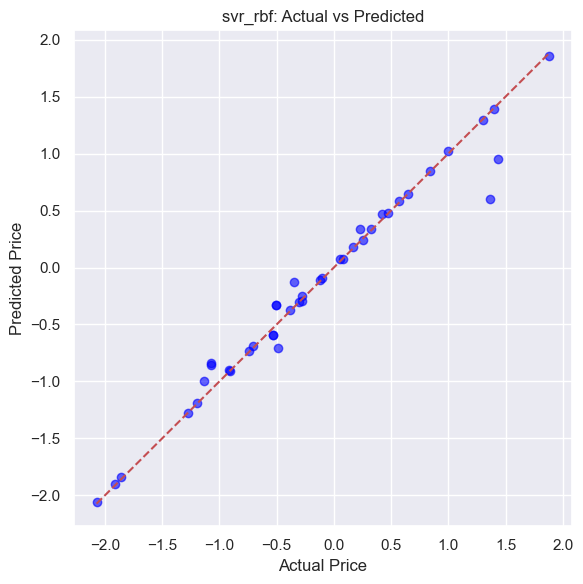

In [353]:
#svr_rbf  actual v/s Predicted comparison

y_pred = svr_rbf.predict(x_validation)
plt.figure(figsize=(6, 6))
plt.scatter(y_validation, y_pred, alpha=0.6, color='blue')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("svr_rbf: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## KNN Model Regressor

In [355]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def find_k(x_train, y_train, x_test, y_test):
    error_rate = []

    for i in range(1, 50):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(mean_squared_error(y_test, y_pred))

    best_k = np.argmin(error_rate) + 1
    best_mse = error_rate[best_k - 1]

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 50), error_rate, color='red', linestyle='dashed', 
             marker='o', markersize=5, markerfacecolor='blue')
    plt.axvline(x=best_k, color='green', linestyle='--', label=f'Best K = {best_k}')
    plt.title("Mean Squared Error vs K-Value")
    plt.xlabel("K-Value")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Best K: {best_k} with MSE: {best_mse:.4f}")
    return best_k, best_mse


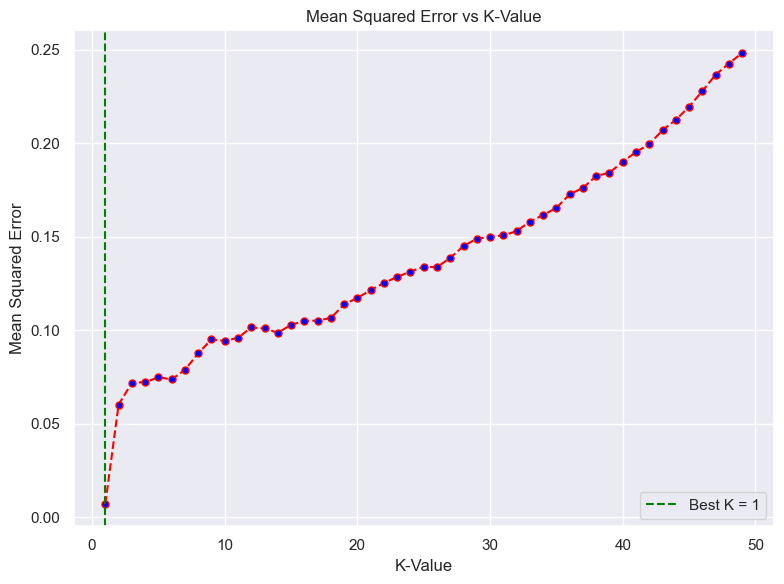

Best K: 1 with MSE: 0.0073


(1, 0.0072771937654615045)

In [356]:
find_k(x_train, y_train, x_validation, y_validation)

In [357]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assume X, y are your features and target arrays

# Standard scaling (if not done already)
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(x_train)

# Try different k values
k_values = range(1, 11)
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Negative MSE scoring, use neg_mean_squared_error and take absolute value later
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = -np.mean(scores)
    cv_scores.append(mean_score)
    print(f"k={k}, CV Mean MSE: {mean_score:.4f}")

# Find best k
best_k = k_values[np.argmin(cv_scores)]
print(f"Best k based on CV MSE: {best_k}")


k=1, CV Mean MSE: 0.0733
k=2, CV Mean MSE: 0.0968
k=3, CV Mean MSE: 0.0991
k=4, CV Mean MSE: 0.1101
k=5, CV Mean MSE: 0.1176
k=6, CV Mean MSE: 0.1265
k=7, CV Mean MSE: 0.1237
k=8, CV Mean MSE: 0.1354
k=9, CV Mean MSE: 0.1334
k=10, CV Mean MSE: 0.1360
Best k based on CV MSE: 1


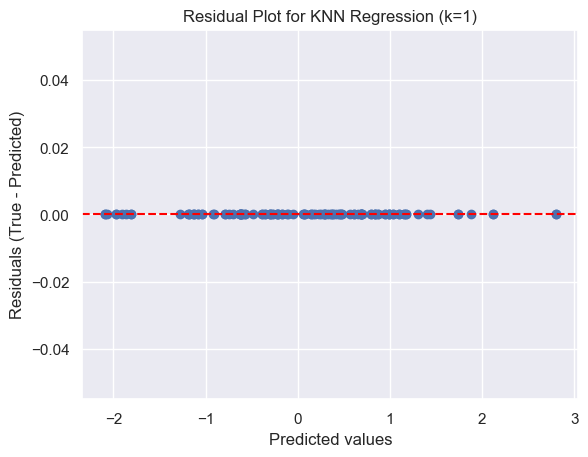

Train MSE: 0.0000
Train R²: 1.0000
Best K: 1.0000


In [358]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Fit model on entire dataset for residual plot
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_train)

residuals = y_train - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (True - Predicted)')
plt.title(f'Residual Plot for KNN Regression (k={best_k})')
plt.show()

# Optionally, print train MSE and R² for quick check
print(f"Train MSE: {mean_squared_error(y_train, y_pred):.4f}")
print(f"Train R²: {r2_score(y_train, y_pred):.4f}")
print(f"Best K: {best_k:.4f}")

In [359]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors': list(range(2, 20))}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)

print("Best k:", grid.best_params_)

Best k: {'n_neighbors': 2}


In [360]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load and prepare your dataset
# Example: mobile is a DataFrame with target column named 'target'
# Replace 'target' with the actual name of your target column
#X = mobile.drop('price', axis=1)
#y = mobile['price']

# Step 2: Train-test split
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3: Create pipeline (StandardScaler → PCA → KNN)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Retain 95% variance
    ('knn', KNeighborsRegressor())
])

# Step 4: Hyperparameter tuning using GridSearchCV
param_grid = {
    'knn__n_neighbors': list(range(2, 15)),
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)

# Step 5: Evaluate best model
best_model = grid.best_estimator_
y_pred = best_model.predict(x_validation)

mse = mean_squared_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

print(f"Best k: {grid.best_params_['knn__n_neighbors']}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")


Best k: 2
Test MSE: 0.0741
Test R²: 0.9149


In [361]:
# Building KNN regressor with k = 2
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(x_train,y_train)

knn_predict_train_data = knn.predict(x_train)
knn_predict_validation_data = knn.predict(x_validation)

knn_mse_validate = mean_squared_error(y_validation,knn_predict_validation_data)  #  Test Error
knn_mse_train = mean_squared_error(y_train,knn_predict_train_data)             #  Train Error

knn_r2_validate = r2_score(y_validation,knn_predict_validation_data)
knn_r2_train = r2_score(y_train,knn_predict_train_data)

print("\nAccuracy Scores for KNN Regression model - RBF kernel model on raw data::")
print("->knn_mean square error_train_data:", knn_mse_train)
print("->knn_mean square error_test_data:", knn_mse_validate)

print("->knn_r2 square error_train_data:", knn_r2_train)
print("->knn_r2 square error_test_data:", knn_r2_validate)

print("\nMSE Value are : \nLess than 0 -> Good \n1-2-->Better\n2-3 -> Average")


Accuracy Scores for KNN Regression model - RBF kernel model on raw data::
->knn_mean square error_train_data: 0.014400158383600443
->knn_mean square error_test_data: 0.06028234338145449
->knn_r2 square error_train_data: 0.9860420542782452
->knn_r2 square error_test_data: 0.9307605279287767

MSE Value are : 
Less than 0 -> Good 
1-2-->Better
2-3 -> Average


## Full Comparison Script Ensemble Comparison



📊 Model Performance Comparison:

Decision Tree:
  -> Train MSE: 0.0000
  -> Test MSE: 0.0691
  -> Train R²: 0.9195
  -> Test R²: 0.9207

Random Forest:
  -> Train MSE: 0.0000
  -> Test MSE: 0.0539
  -> Train R²: 0.9430
  -> Test R²: 0.9380

Gradient Boosting:
  -> Train MSE: 0.0000
  -> Test MSE: 0.0198
  -> Train R²: 0.9886
  -> Test R²: 0.9772

XGBoost:
  -> Train MSE: 0.0000
  -> Test MSE: 0.0073
  -> Train R²: 1.0000
  -> Test R²: 0.9917

svr_poly:
  -> Train MSE: 0.0000
  -> Test MSE: 0.0330
  -> Train R²: 0.9810
  -> Test R²: 0.9621

svr_lin:
  -> Train MSE: 0.0000
  -> Test MSE: 0.0506
  -> Train R²: 0.9528
  -> Test R²: 0.9419

svr_rbf:
  -> Train MSE: 0.0000
  -> Test MSE: 0.0273
  -> Train R²: 0.9974
  -> Test R²: 0.9686

linear_model:
  -> Train MSE: 0.0000
  -> Test MSE: 0.0475
  -> Train R²: 0.9545
  -> Test R²: 0.9454

lasso:
  -> Train MSE: 0.0000
  -> Test MSE: 0.0481
  -> Train R²: 0.9542
  -> Test R²: 0.9447

ridge:
  -> Train MSE: 0.0000
  -> Test MSE: 0.0512
  -> T

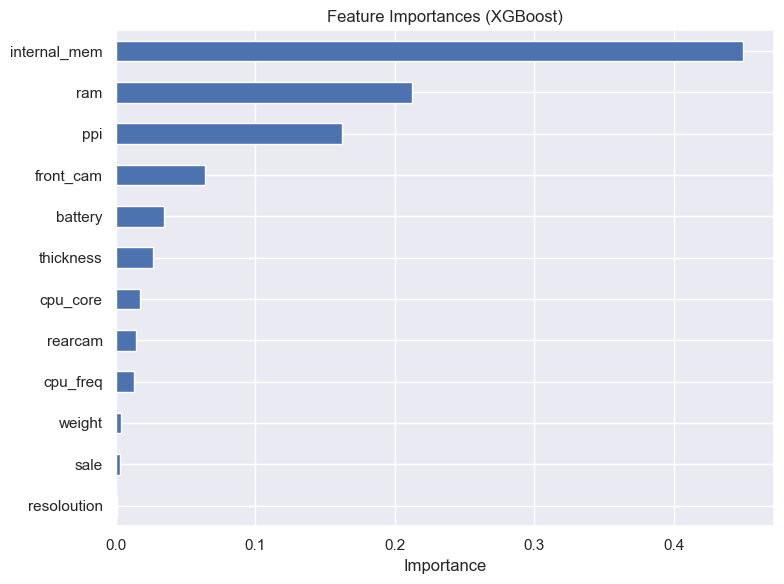

In [363]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Sample split – replace X, y with your actual dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model configurations
models = {
    'Decision Tree': DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators = 400, max_features= "sqrt",min_samples_leaf=5 ,random_state = 1, max_depth = 7),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators = 400, max_depth = 3,learning_rate=0.01,min_samples_leaf=5, random_state = 42),
    'XGBoost' : xgb.XGBRegressor(random_state = 111, max_depth = 3),
    'svr_poly': SVR(kernel ="poly",epsilon=0.01,gamma="scale",C=0.1,coef0=1,degree=4),
    'svr_lin' : SVR(kernel ="linear",C=100,epsilon=0.01,gamma="scale"),
    'svr_rbf' : SVR(C=10,coef0=0,degree=2,epsilon=0.01,kernel ="rbf"),
    'linear_model' : LinearRegression(),
    'lasso' : LassoCV(cv=5),#alpha=0.02310129700083160),
    'ridge' : Ridge(alpha=10.722672220103231),
    'elastic' : ElasticNet(alpha=0.0012328467394420659)

}

# Dictionary to hold scores
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_validation)

    mse_train = mean_squared_error(y_train, y_train)
    mse_test = mean_squared_error(y_validation, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_validation, y_test_pred)

    results[name] = {
        'Train MSE': mse_train,
        'Test MSE': mse_test,
        'Train R²': r2_train,
        'Test R²': r2_test,
        'Model': model
    }

# Print results
print("\n📊 Model Performance Comparison:\n")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  -> Train MSE: {metrics['Train MSE']:.4f}")
    print(f"  -> Test MSE: {metrics['Test MSE']:.4f}")
    print(f"  -> Train R²: {metrics['Train R²']:.4f}")
    print(f"  -> Test R²: {metrics['Test R²']:.4f}")
    print("")

# Feature importance plot for the best test R² model
best_model_name = max(results, key=lambda x: results[x]['Test R²'])
best_model = results[best_model_name]['Model']

# Plot if model supports feature importances
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    feat_names = x_train.columns if hasattr(x_train, 'columns') else [f'Feature {i}' for i in range(x_train.shape[1])]
    pd.Series(importances, index=feat_names).sort_values(ascending=True).plot(kind='barh', figsize=(8, 6))
    plt.title(f"Feature Importances ({best_model_name})")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()
else:
    print(f"{best_model_name} does not support feature importances.")

## Compare the Actual v/s Predicted visualization


In [365]:
xgboost

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [366]:
final_modell = xgboost